In [1]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.ma as ma


from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm


# configure plotting
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline

# Loading Correlation functions

## Bustelo

In [9]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/Bustelo/Bustelo_May192021_A')

In [10]:
### Loading means
Bustelo_May192021_A_correlation_means = np.load('Bustelo_May192021_A_correlation_means.npz')
Bustelo_May192021_A_correlation_means = Bustelo_May192021_A_correlation_means['data1']

## Crushed silica

In [24]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/CrushedSilica/')

In [25]:
CrushedSilica_May142021_A_correlation_means = np.load('CrushedSilica_May142021_A/CrushedSilica_May142021_A_correlation_means.npz')
CrushedSilica_May142021_A_correlation_means = CrushedSilica_May142021_A_correlation_means['data1']

CrushedSilica_May142021_B_correlation_means = np.load('CrushedSilica_May142021_B/CrushedSilica_May142021_B_correlation_means.npz')
CrushedSilica_May142021_B_correlation_means = CrushedSilica_May142021_B_correlation_means['data1']

CrushedSilica_May142021_C_correlation_means = np.load('CrushedSilica_May142021_C/CrushedSilica_May142021_C_correlation_means.npz')
CrushedSilica_May142021_C_correlation_means = CrushedSilica_May142021_C_correlation_means['data1']

## Flour

In [38]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/Flour')

In [44]:
Flour_May252021_A_correlation_means = np.load('Flour_May252021_A/Flour_May252021_A_correlation_means.npz')
Flour_May252021_A_correlation_means = Flour_May252021_A_correlation_means['data1']

Flour_May252021_B_correlation_means = np.load('Flour_May252021_B/Flour_May252021_B_correlation_means.npz')
Flour_May252021_B_correlation_means = Flour_May252021_B_correlation_means['data1']

Flour_May252021_C_correlation_means = np.load('Flour_May252021_C/Flour_May252021_C_correlation_means.npz')
Flour_May252021_C_correlation_means = Flour_May252021_C_correlation_means['data1']

## Glass beads

In [48]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/GlassBeads')

In [49]:
GlassBeads_May132021_A_correlation_means = np.load('GlassBeads_May132021_A/GlassBeads_May132021_A_correlation_means.npz')
GlassBeads_May132021_A_correlation_means = GlassBeads_May132021_A_correlation_means['data1']

GlassBeads_May132021_B_correlation_means = np.load('GlassBeads_May132021_B/GlassBeads_May132021_B_correlation_means.npz')
GlassBeads_May132021_B_correlation_means = GlassBeads_May132021_B_correlation_means['data1']

GlassBeads_May132021_C_correlation_means = np.load('GlassBeads_May132021_C/GlassBeads_May132021_C_correlation_means.npz')
GlassBeads_May132021_C_correlation_means = GlassBeads_May132021_C_correlation_means['data1']

## Glitter

In [54]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/Glitter')

In [55]:
Glitter_May212021_A_correlation_means = np.load('Glitter_May212021_A/Glitter_May212021_A_correlation_means.npz')
Glitter_May212021_A_correlation_means = Glitter_May212021_A_correlation_means['data1']

Glitter_May212021_B_correlation_means = np.load('Glitter_May212021_B/Glitter_May212021_B_correlation_means.npz')
Glitter_May212021_B_correlation_means = Glitter_May212021_B_correlation_means['data1']

Glitter_May212021_C_correlation_means = np.load('Glitter_May212021_C/Glitter_May212021_C_correlation_means.npz')
Glitter_May212021_C_correlation_means = Glitter_May212021_C_correlation_means['data1']

## Kaolinite

In [58]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/Kaolinite')

In [59]:
Kaolinite_May182021_A_correlation_means = np.load('Kaolinite_May182021_A/Kaolinite_May182021_A_correlation_means.npz')
Kaolinite_May182021_A_correlation_means = Kaolinite_May182021_A_correlation_means['data1']

Kaolinite_May182021_B_correlation_means = np.load('Kaolinite_May182021_B/Kaolinite_May182021_B_correlation_means.npz')
Kaolinite_May182021_B_correlation_means = Kaolinite_May182021_B_correlation_means['data1']

Kaolinite_May182021_C_correlation_means = np.load('Kaolinite_May182021_C/Kaolinite_May182021_C_correlation_means.npz')
Kaolinite_May182021_C_correlation_means = Kaolinite_May182021_C_correlation_means['data1']

# Correlation functions

In [ ]:
def correlation_functions(correlation_maps_cumulative):
    
    # ensuring that G goes from 0 to 1
    G_mean = correlation_maps_cumulative
    g = G_mean
    d = np.min(g)
    gp = (g-d)/(1-d)
    tau = np.arange(1,1001,1)

    
    from matplotlib.pyplot import cm
    labels = list(np.logspace(1, 13, num=14, base=2))
    color=iter(cm.viridis(np.linspace(0,1,14)))

    fig = plt.figure(figsize=(4, 3))
    ax1 = plt.subplot(111)

    for t in range(14):
        c=next(color)
        ax1.plot(tau,gp[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
        
    ax1.set_xscale('log')
    ax1.set_xlabel(r'$ \tau $ (s)')
    ax1.set_ylabel(r'$ \langle G \rangle$')
    box = ax1.get_position()
    lgd = ax1.legend()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax1.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))


    plt.tight_layout()

## Bustelo

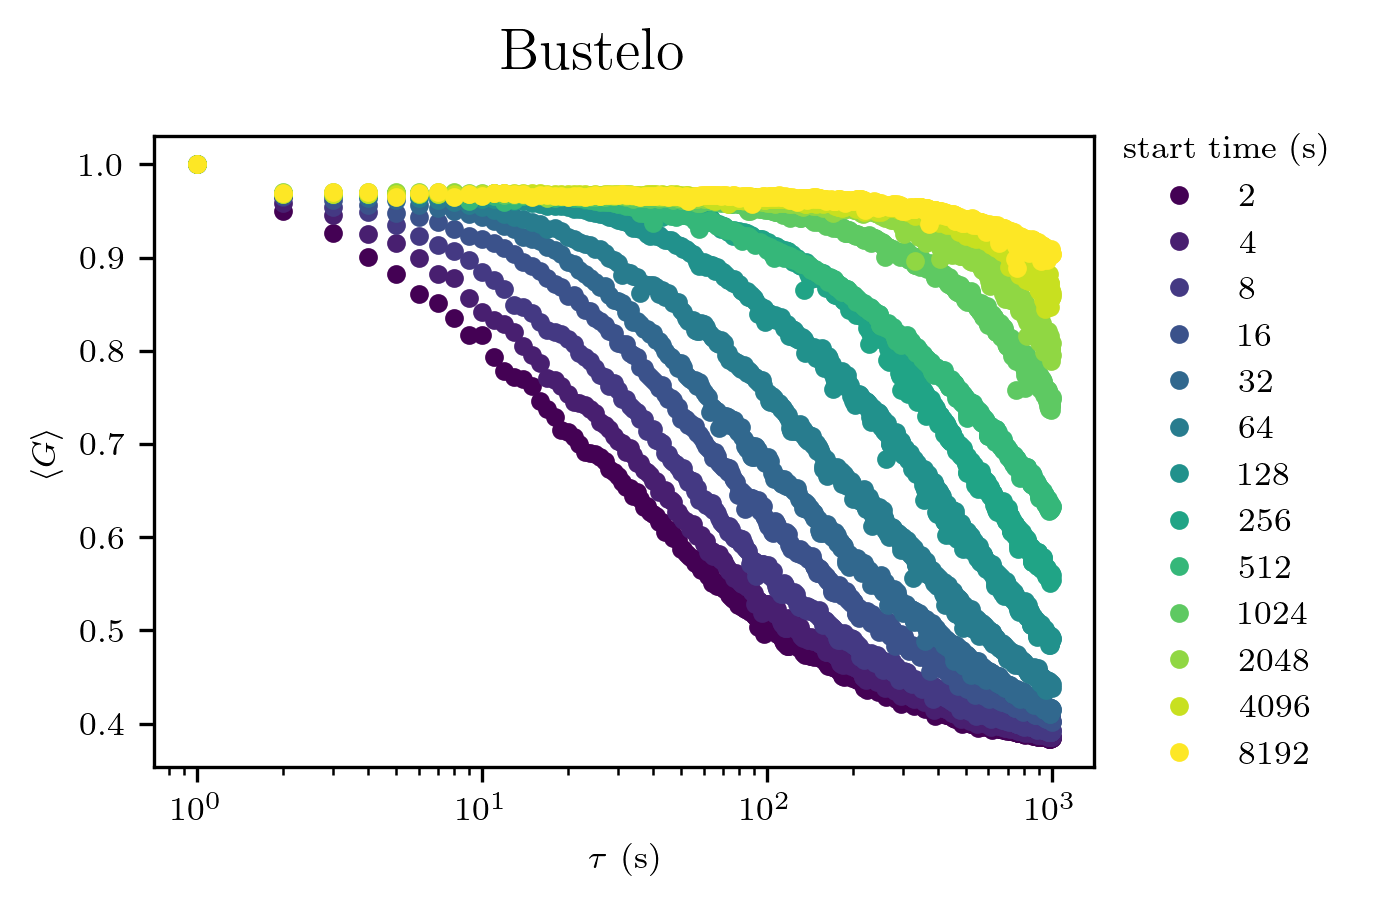

In [23]:
# ensuring that G goes from 0 to 1
G_mean_a = Bustelo_May192021_A_correlation_means


tau = np.arange(1,1001,1)
labels = list(np.logspace(1, 13, num=13, base=2))


from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=13, base=2))

fig = plt.figure(figsize=(4, 3))
ax1 = plt.subplot(111)

color=iter(cm.viridis(np.linspace(0,1,13)))

for t in range(13):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))


fig.suptitle("Bustelo", fontsize=14)

ax1.set_xscale('log')

ax1.set_xlabel(r'$ \tau $ (s)')
ax1.set_ylabel(r'$ \langle G \rangle$')

box = ax1.get_position()
lgd = ax1.legend()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Figures/Bustelo/Bustelo_May192021_A/Bustelo_May192021_A_correlationfunctions.pdf',bbox_inches='tight')

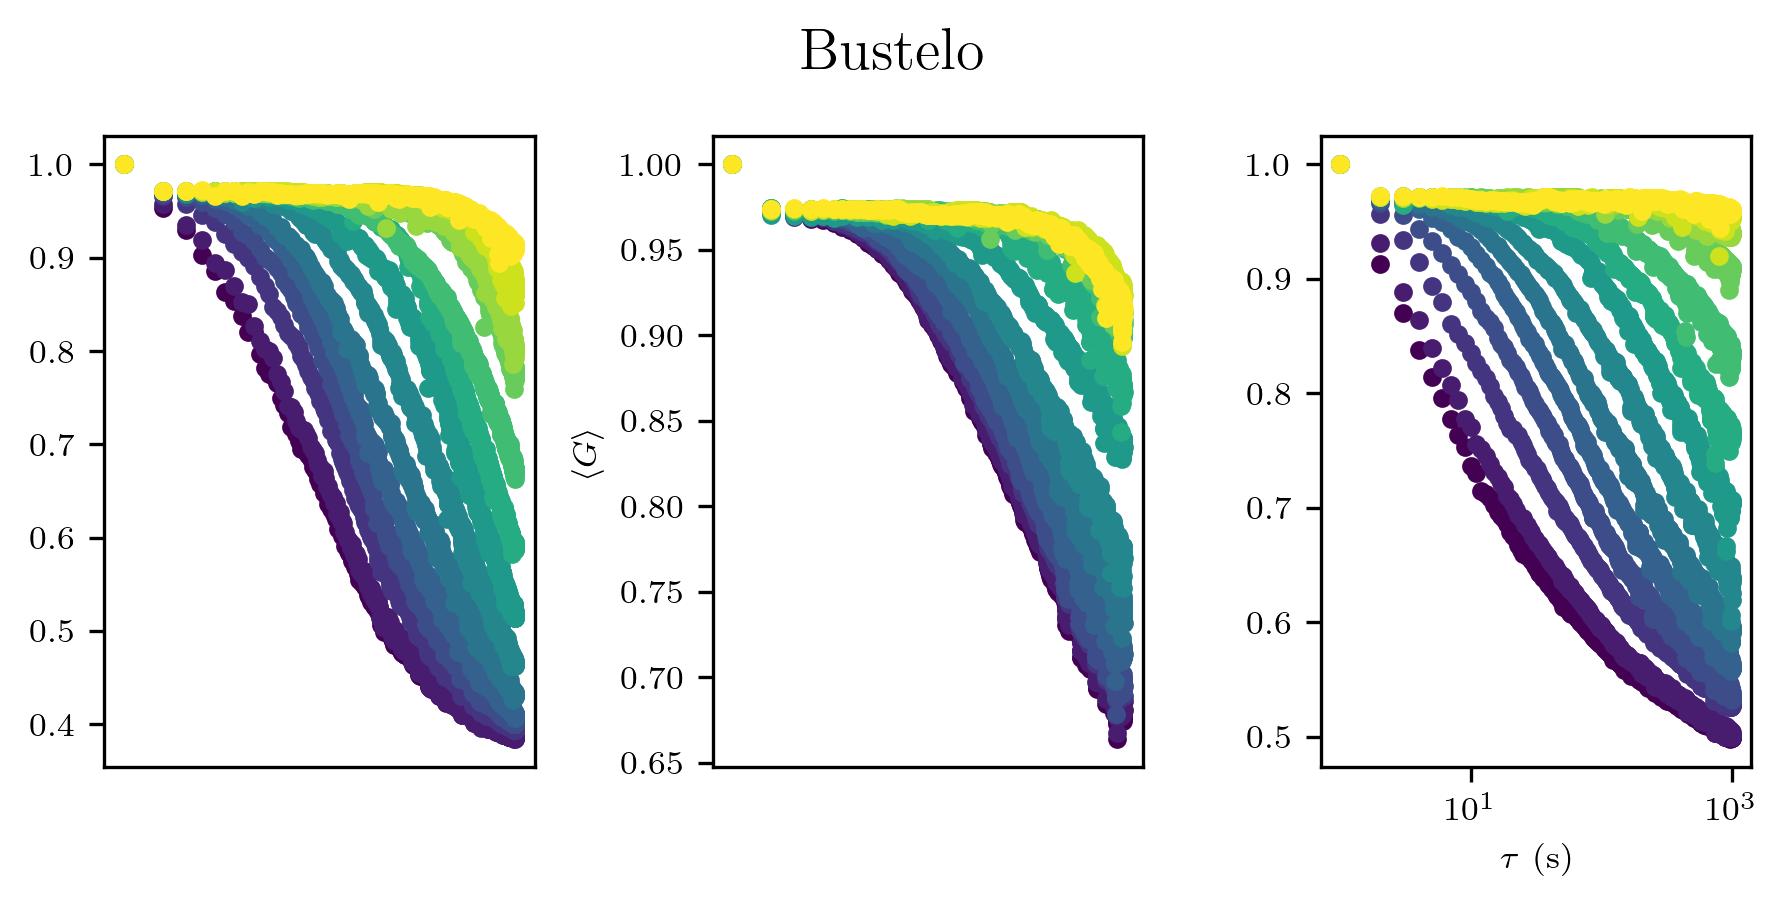

In [150]:
# ensuring that G goes from 0 to 1
G_mean_a = Bustelo_May192021_A_correlation_means
G_mean_b = Bustelo_May192021_B_correlation_means
G_mean_c = Bustelo_May192021_C_correlation_means

tau = np.arange(1,1001,1)

from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=14, base=2))

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

color=iter(cm.viridis(np.linspace(0,1,14)))
for t in range(14):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,14)))
for t in range(14):
    c=next(color)
    ax2.plot(tau,G_mean_b[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,14)))
for t in range(14):
    c=next(color)
    ax3.plot(tau,G_mean_c[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))

fig.suptitle("Bustelo", fontsize=14)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_xticks([])
ax2.set_xticks([])

ax3.set_xlabel(r'$ \tau $ (s)')
ax2.set_ylabel(r'$ \langle G \rangle$')

# box = ax3.get_position()
# lgd = ax3.legend()
# ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax3.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()

## Crushed Silica

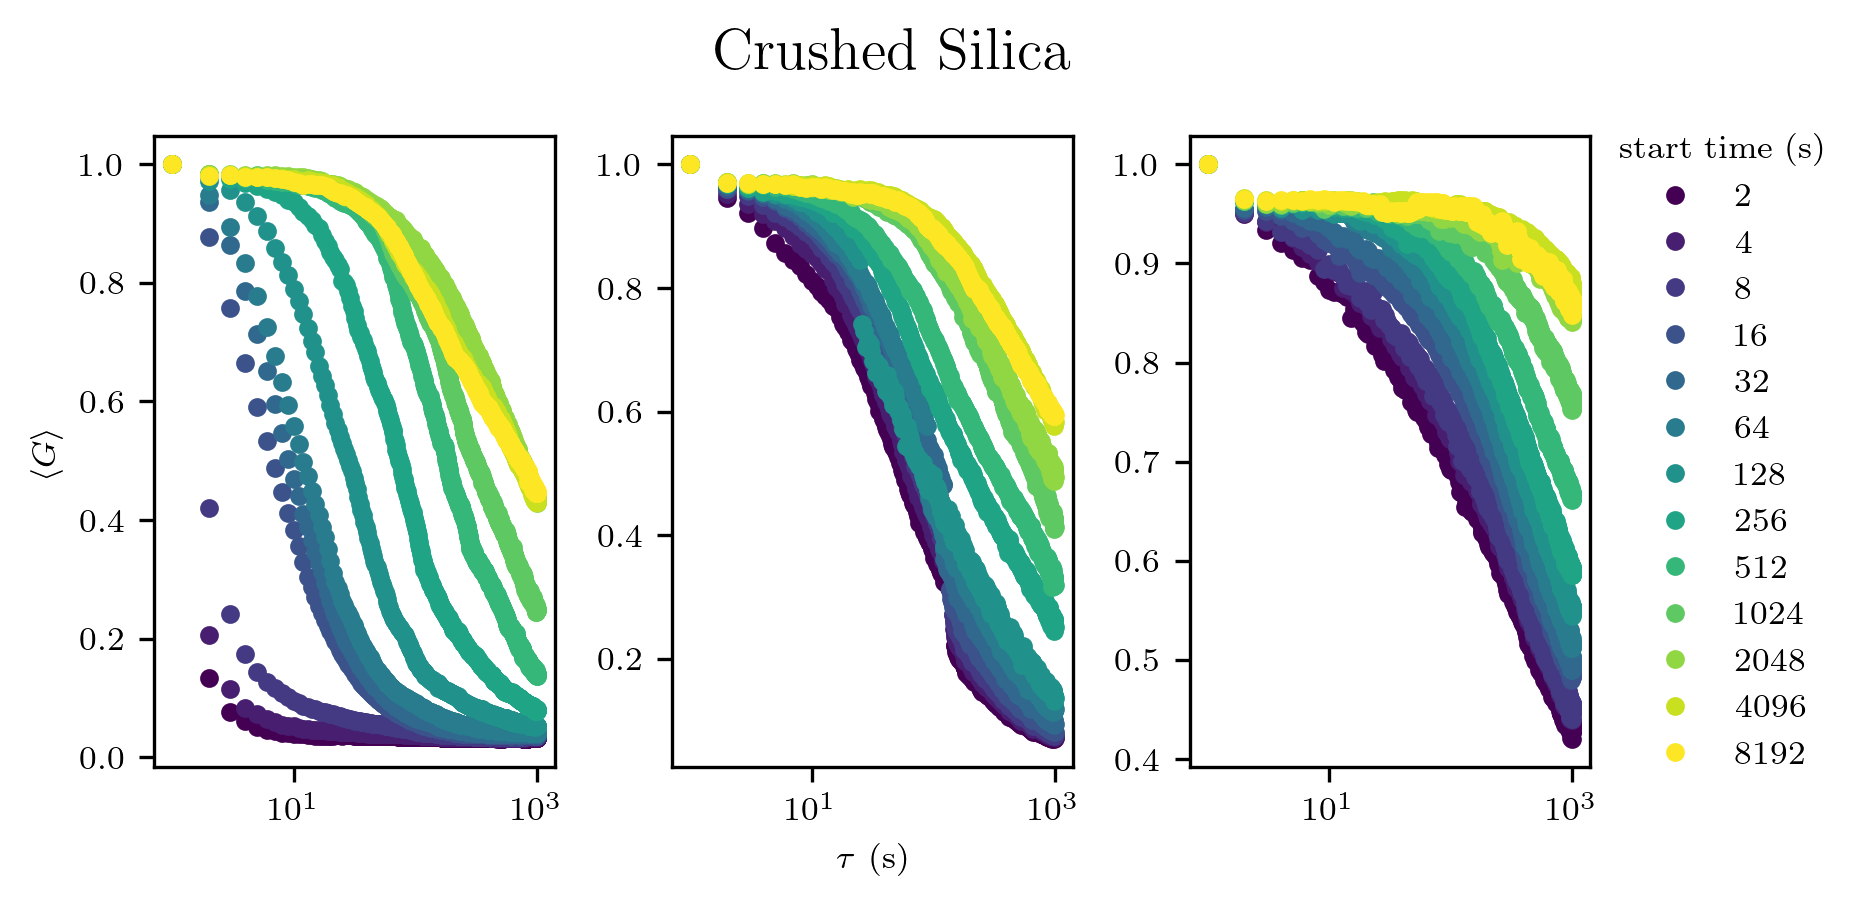

In [42]:
# ensuring that G goes from 0 to 1
G_mean_a = CrushedSilica_May142021_A_correlation_means
G_mean_b = CrushedSilica_May142021_B_correlation_means
G_mean_c = CrushedSilica_May142021_C_correlation_means

# g = Kaolinite_May182021_A_correlation_means
# g_min = np.min(g)
# gp = (g-g_min)/(1-g_min)

tau = np.arange(1,1001,1)

from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=13, base=2))

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax2.plot(tau,G_mean_b[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax3.plot(tau,G_mean_c[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))

fig.suptitle("Crushed Silica", fontsize=14)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

# ax1.set_xticks([])
# ax2.set_xticks([])

ax2.set_xlabel(r'$ \tau $ (s)')
ax1.set_ylabel(r'$ \langle G \rangle$')

box = ax3.get_position()
lgd = ax3.legend()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Figures/CrushedSilica/CrushedSilica_May142021_A/CrushedSilica_May142021_A_correlationfunctions.pdf',bbox_inches='tight')

## Flour

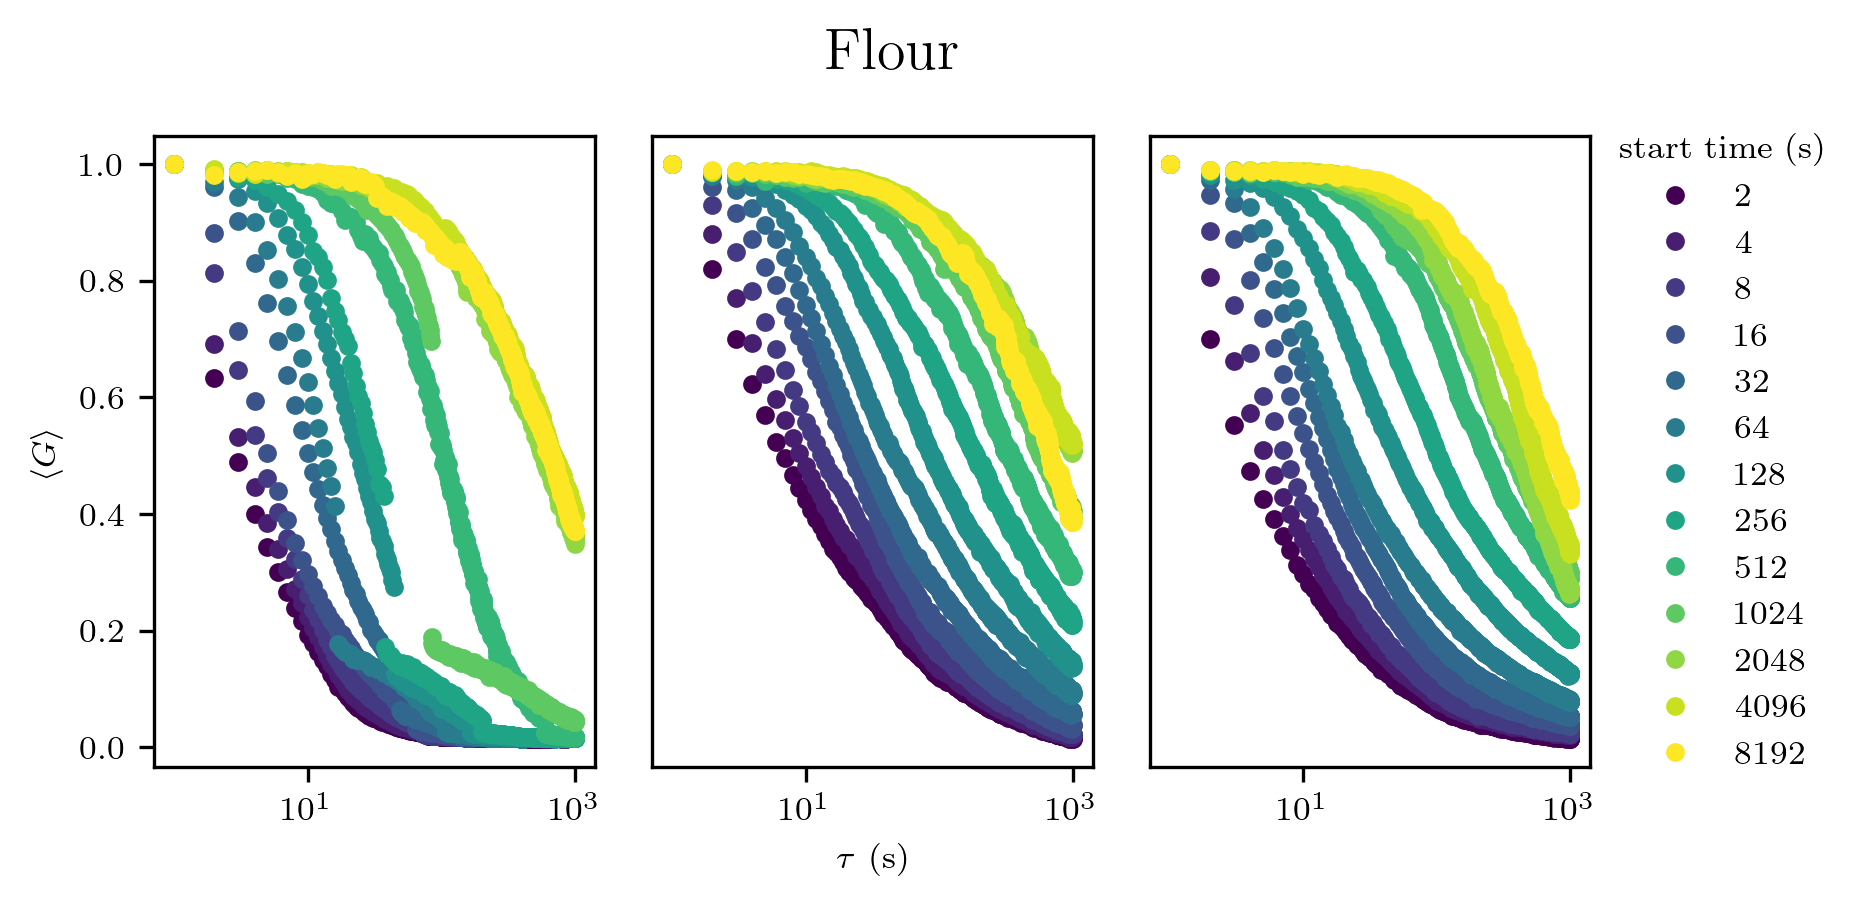

In [47]:
# ensuring that G goes from 0 to 1
G_mean_a = Flour_May252021_A_correlation_means
G_mean_b = Flour_May252021_B_correlation_means
G_mean_c = Flour_May252021_C_correlation_means

tau = np.arange(1,1001,1)

from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=13, base=2))

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax2.plot(tau,G_mean_b[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax3.plot(tau,G_mean_c[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))

fig.suptitle("Flour", fontsize=14)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

# ax1.set_xticks([])
ax2.set_yticks([])
ax3.set_yticks([])


ax1.set_ylabel(r'$ \langle G \rangle$')
ax2.set_xlabel(r'$ \tau $ (s)')

box = ax3.get_position()
lgd = ax3.legend()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Figures/Flour/Flour_May252021_correlationfunctions.pdf',bbox_inches='tight')

## Glass Beads

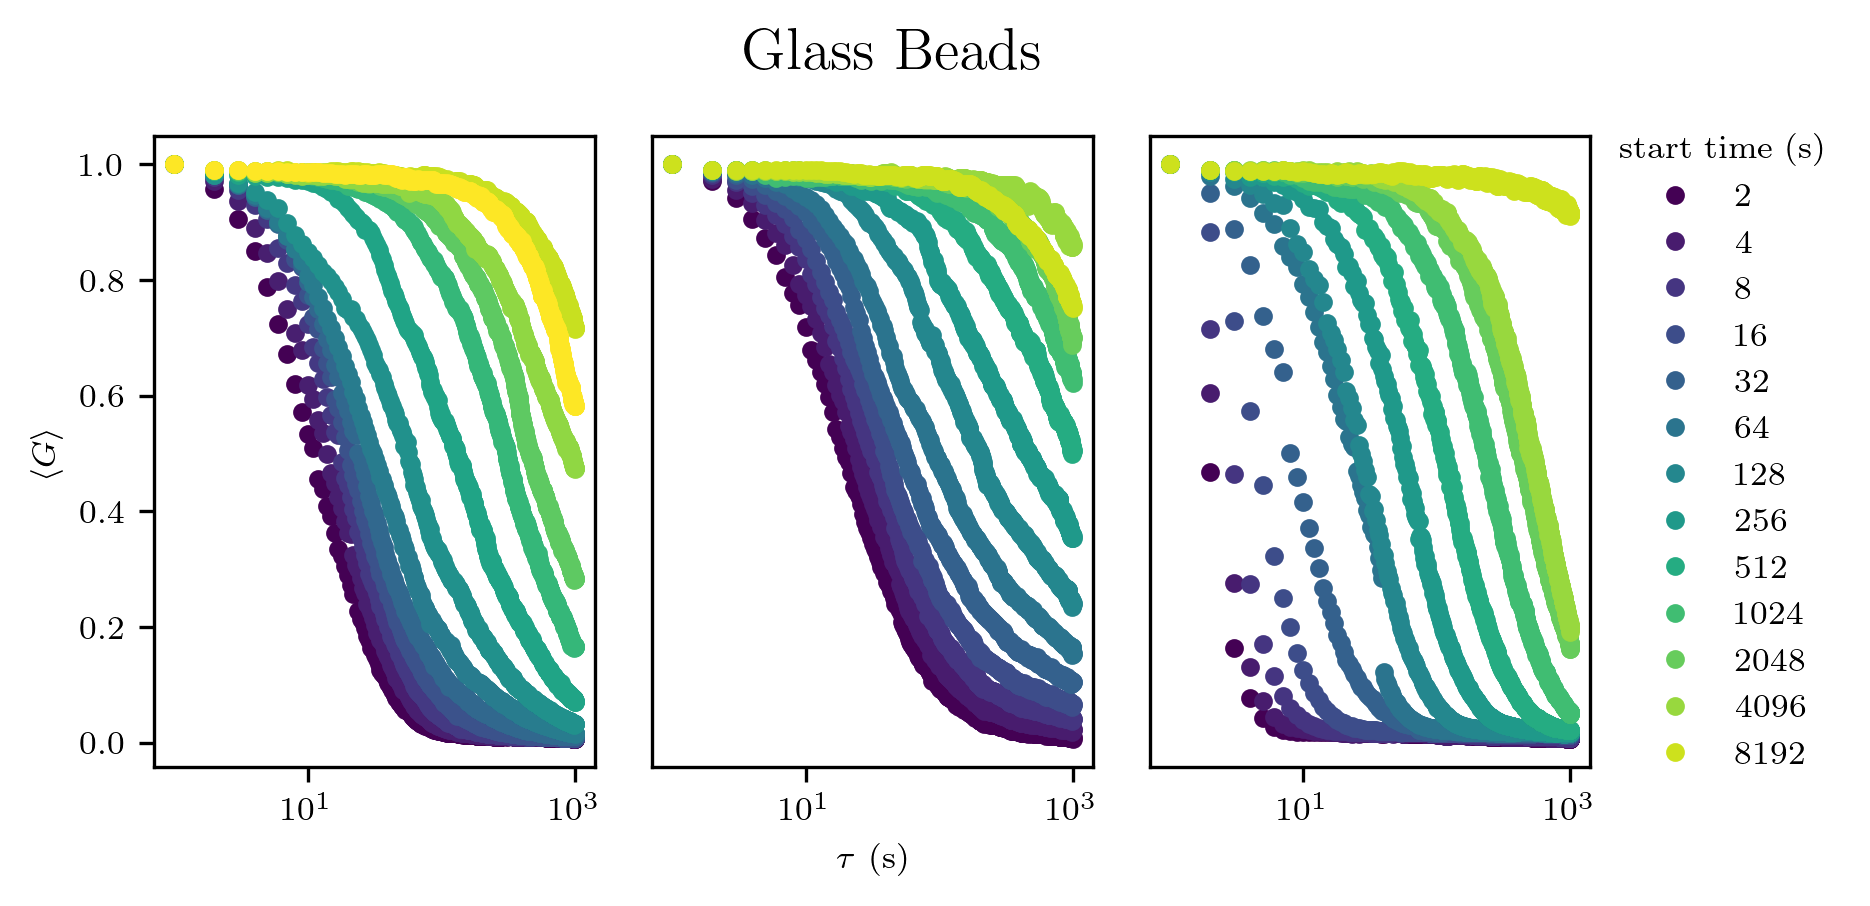

In [52]:
# ensuring that G goes from 0 to 1
G_mean_a = GlassBeads_May132021_A_correlation_means
G_mean_b = GlassBeads_May132021_B_correlation_means
G_mean_c = GlassBeads_May132021_C_correlation_means

tau = np.arange(1,1001,1)

from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=13, base=2))

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,14)))
for t in range(13):
    c=next(color)
    ax2.plot(tau,G_mean_b[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,14)))
for t in range(13):
    c=next(color)
    ax3.plot(tau,G_mean_c[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))

fig.suptitle("Glass Beads", fontsize=14)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

# ax1.set_xticks([])
ax2.set_yticks([])
ax3.set_yticks([])


ax1.set_ylabel(r'$ \langle G \rangle$')
ax2.set_xlabel(r'$ \tau $ (s)')

box = ax3.get_position()
lgd = ax3.legend()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Figures/GlassBeads/GlassBeads_May132021_correlationfunctions.pdf',bbox_inches='tight')

## Glitter

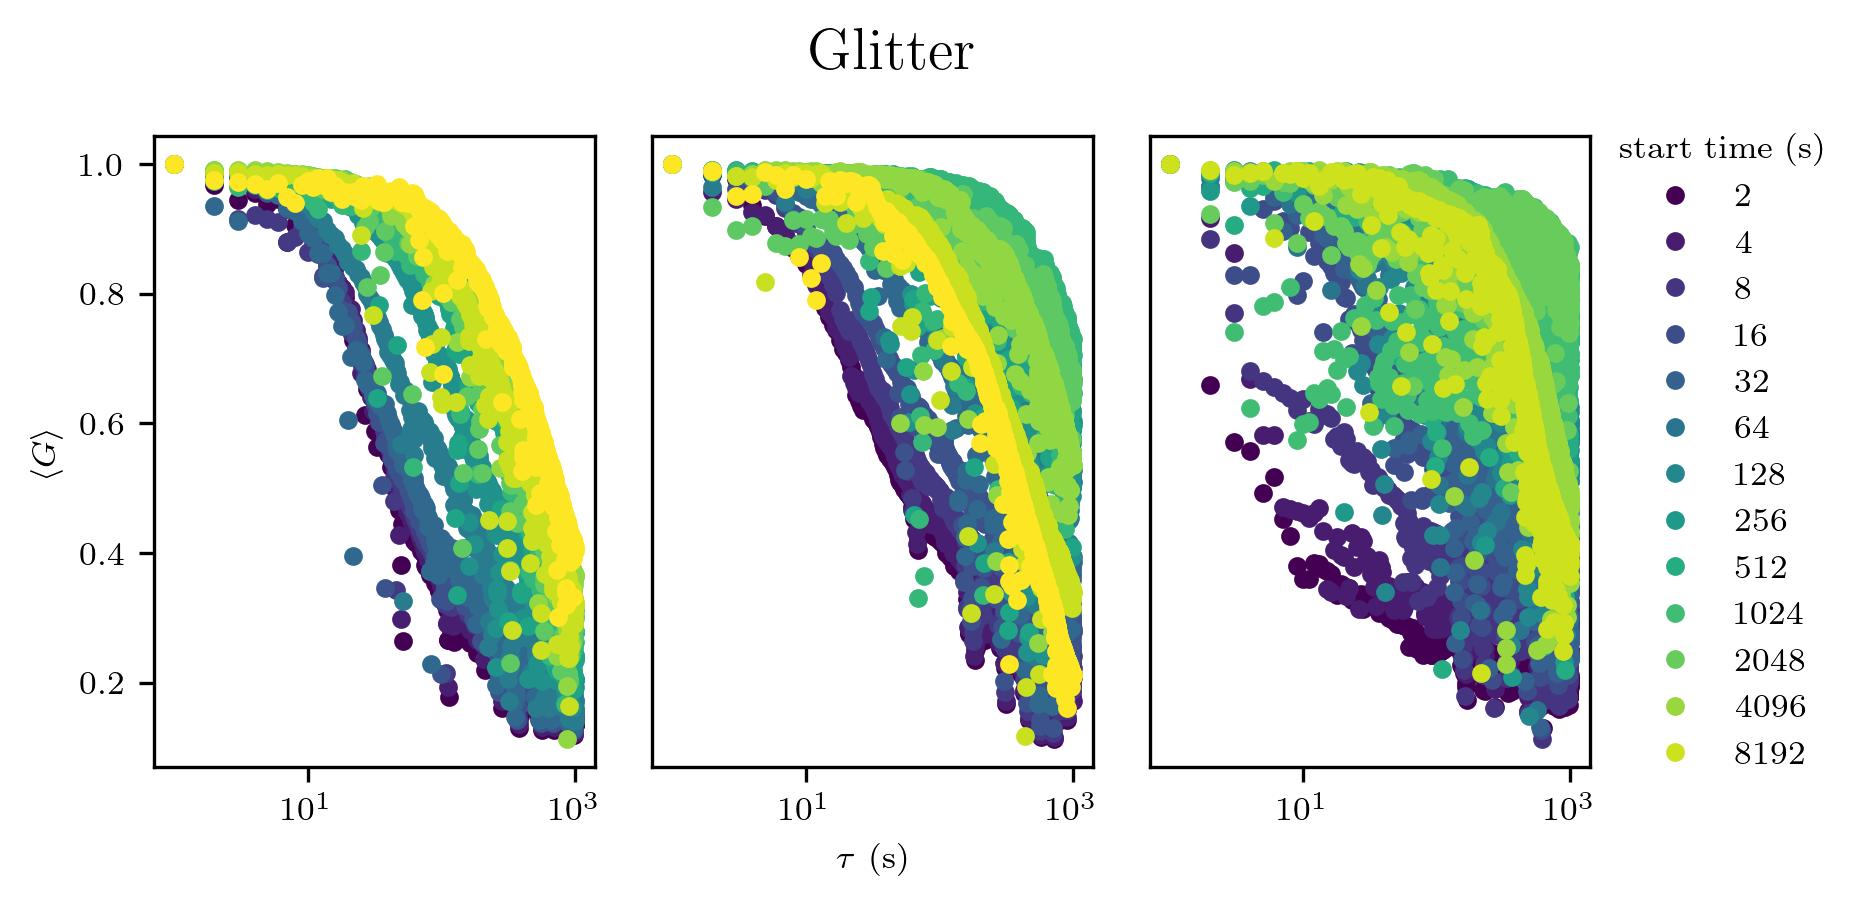

In [57]:
# ensuring that G goes from 0 to 1
G_mean_a = Glitter_May212021_A_correlation_means
G_mean_b = Glitter_May212021_B_correlation_means
G_mean_c = Glitter_May212021_C_correlation_means


tau = np.arange(1,1001,1)

from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=13, base=2))

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax2.plot(tau,G_mean_b[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,14)))
for t in range(13):
    c=next(color)
    ax3.plot(tau,G_mean_c[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))

fig.suptitle("Glitter", fontsize=14)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

# ax1.set_xticks([])
ax2.set_yticks([])
ax3.set_yticks([])


ax1.set_ylabel(r'$ \langle G \rangle$')
ax2.set_xlabel(r'$ \tau $ (s)')


box = ax3.get_position()
lgd = ax3.legend()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Figures/Glitter/Glitter_May132021_correlationfunctions.pdf',bbox_inches='tight')

## Kaolinite

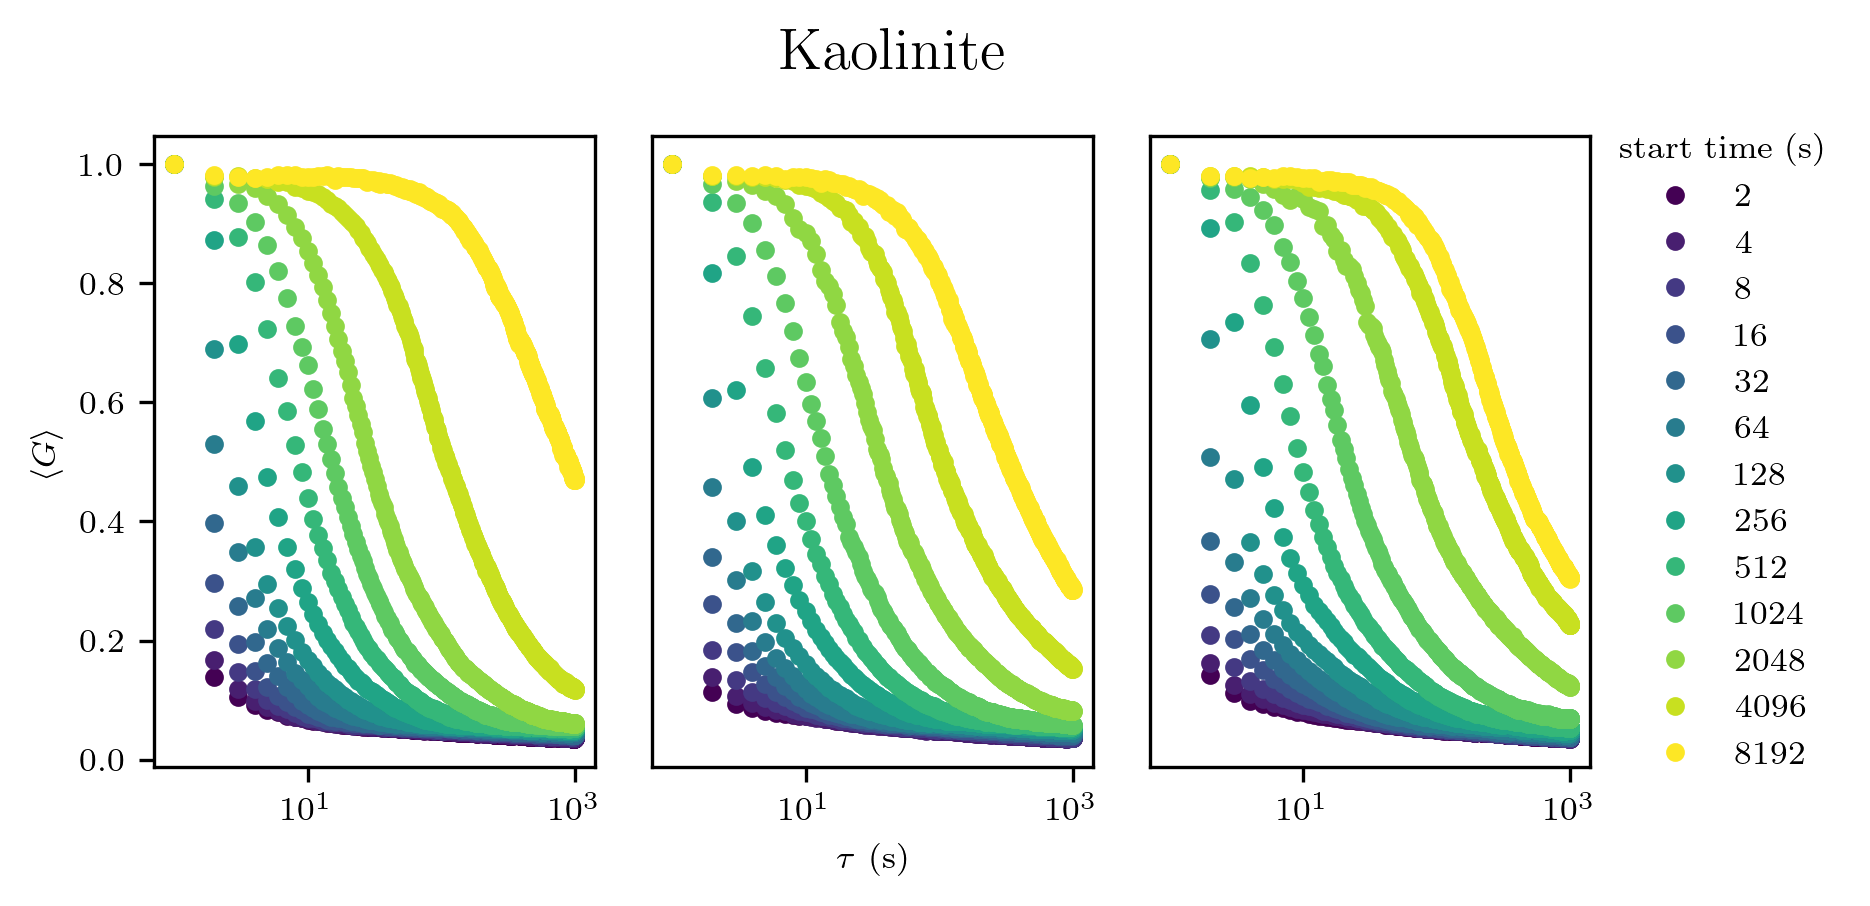

In [60]:
# ensuring that G goes from 0 to 1
G_mean_a = Kaolinite_May182021_A_correlation_means
G_mean_b = Kaolinite_May182021_B_correlation_means
G_mean_c = Kaolinite_May182021_C_correlation_means


tau = np.arange(1,1001,1)

from matplotlib.pyplot import cm
labels = list(np.logspace(1, 13, num=13, base=2))

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax1.plot(tau,G_mean_a[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax2.plot(tau,G_mean_b[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))
color=iter(cm.viridis(np.linspace(0,1,13)))
for t in range(13):
    c=next(color)
    ax3.plot(tau,G_mean_c[t] ,'o',color = c,markersize = 3.5,alpha = 1,label = int(labels[t]))

fig.suptitle("Kaolinite", fontsize=14)


ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

# ax1.set_xticks([])
ax2.set_yticks([])
ax3.set_yticks([])


ax1.set_ylabel(r'$ \langle G \rangle$')
ax2.set_xlabel(r'$ \tau $ (s)')

box = ax3.get_position()
lgd = ax3.legend()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))

plt.tight_layout()


plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Creep/MaterialsBoundaries/Figures/Kaolinite/Kaolinite_May182021_correlationfunctions.pdf',bbox_inches='tight')

# Efold timescale - fit

## Crushed Silica

In [61]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/CrushedSilica/')

CrushedSilica_May142021_A_tau = np.load('CrushedSilica_May142021_A/CrushedSilica_May142021_A_tau.npz')
CrushedSilica_May142021_A_tau = CrushedSilica_May142021_A_tau['data1']

CrushedSilica_May142021_B_tau = np.load('CrushedSilica_May142021_B/CrushedSilica_May142021_B_tau.npz')
CrushedSilica_May142021_B_tau = CrushedSilica_May142021_B_tau['data1']

CrushedSilica_May142021_C_tau = np.load('CrushedSilica_May142021_C/CrushedSilica_May142021_C_tau.npz')
CrushedSilica_May142021_C_tau = CrushedSilica_May142021_C_tau['data1']

## Flour

In [70]:
os.chdir('/media/nakul/Seagate Portable Drive/Data/DWS_Correlation_Outputs/Materials/Flour/')

Flour_May252021_A_tau = np.load('Flour_May252021_A/Flour_May252021_A_tau.npz')
Flour_May252021_A_tau = Flour_May252021_A_tau['data1']

Flour_May252021_B_tau = np.load('Flour_May252021_B/Flour_May252021_B_tau.npz')
Flour_May252021_B_tau = Flour_May252021_B_tau['data1']

Flour_May252021_C_tau = np.load('Flour_May252021_C/Flour_May252021_C_tau.npz')
Flour_May252021_C_tau = Flour_May252021_C_tau['data1']

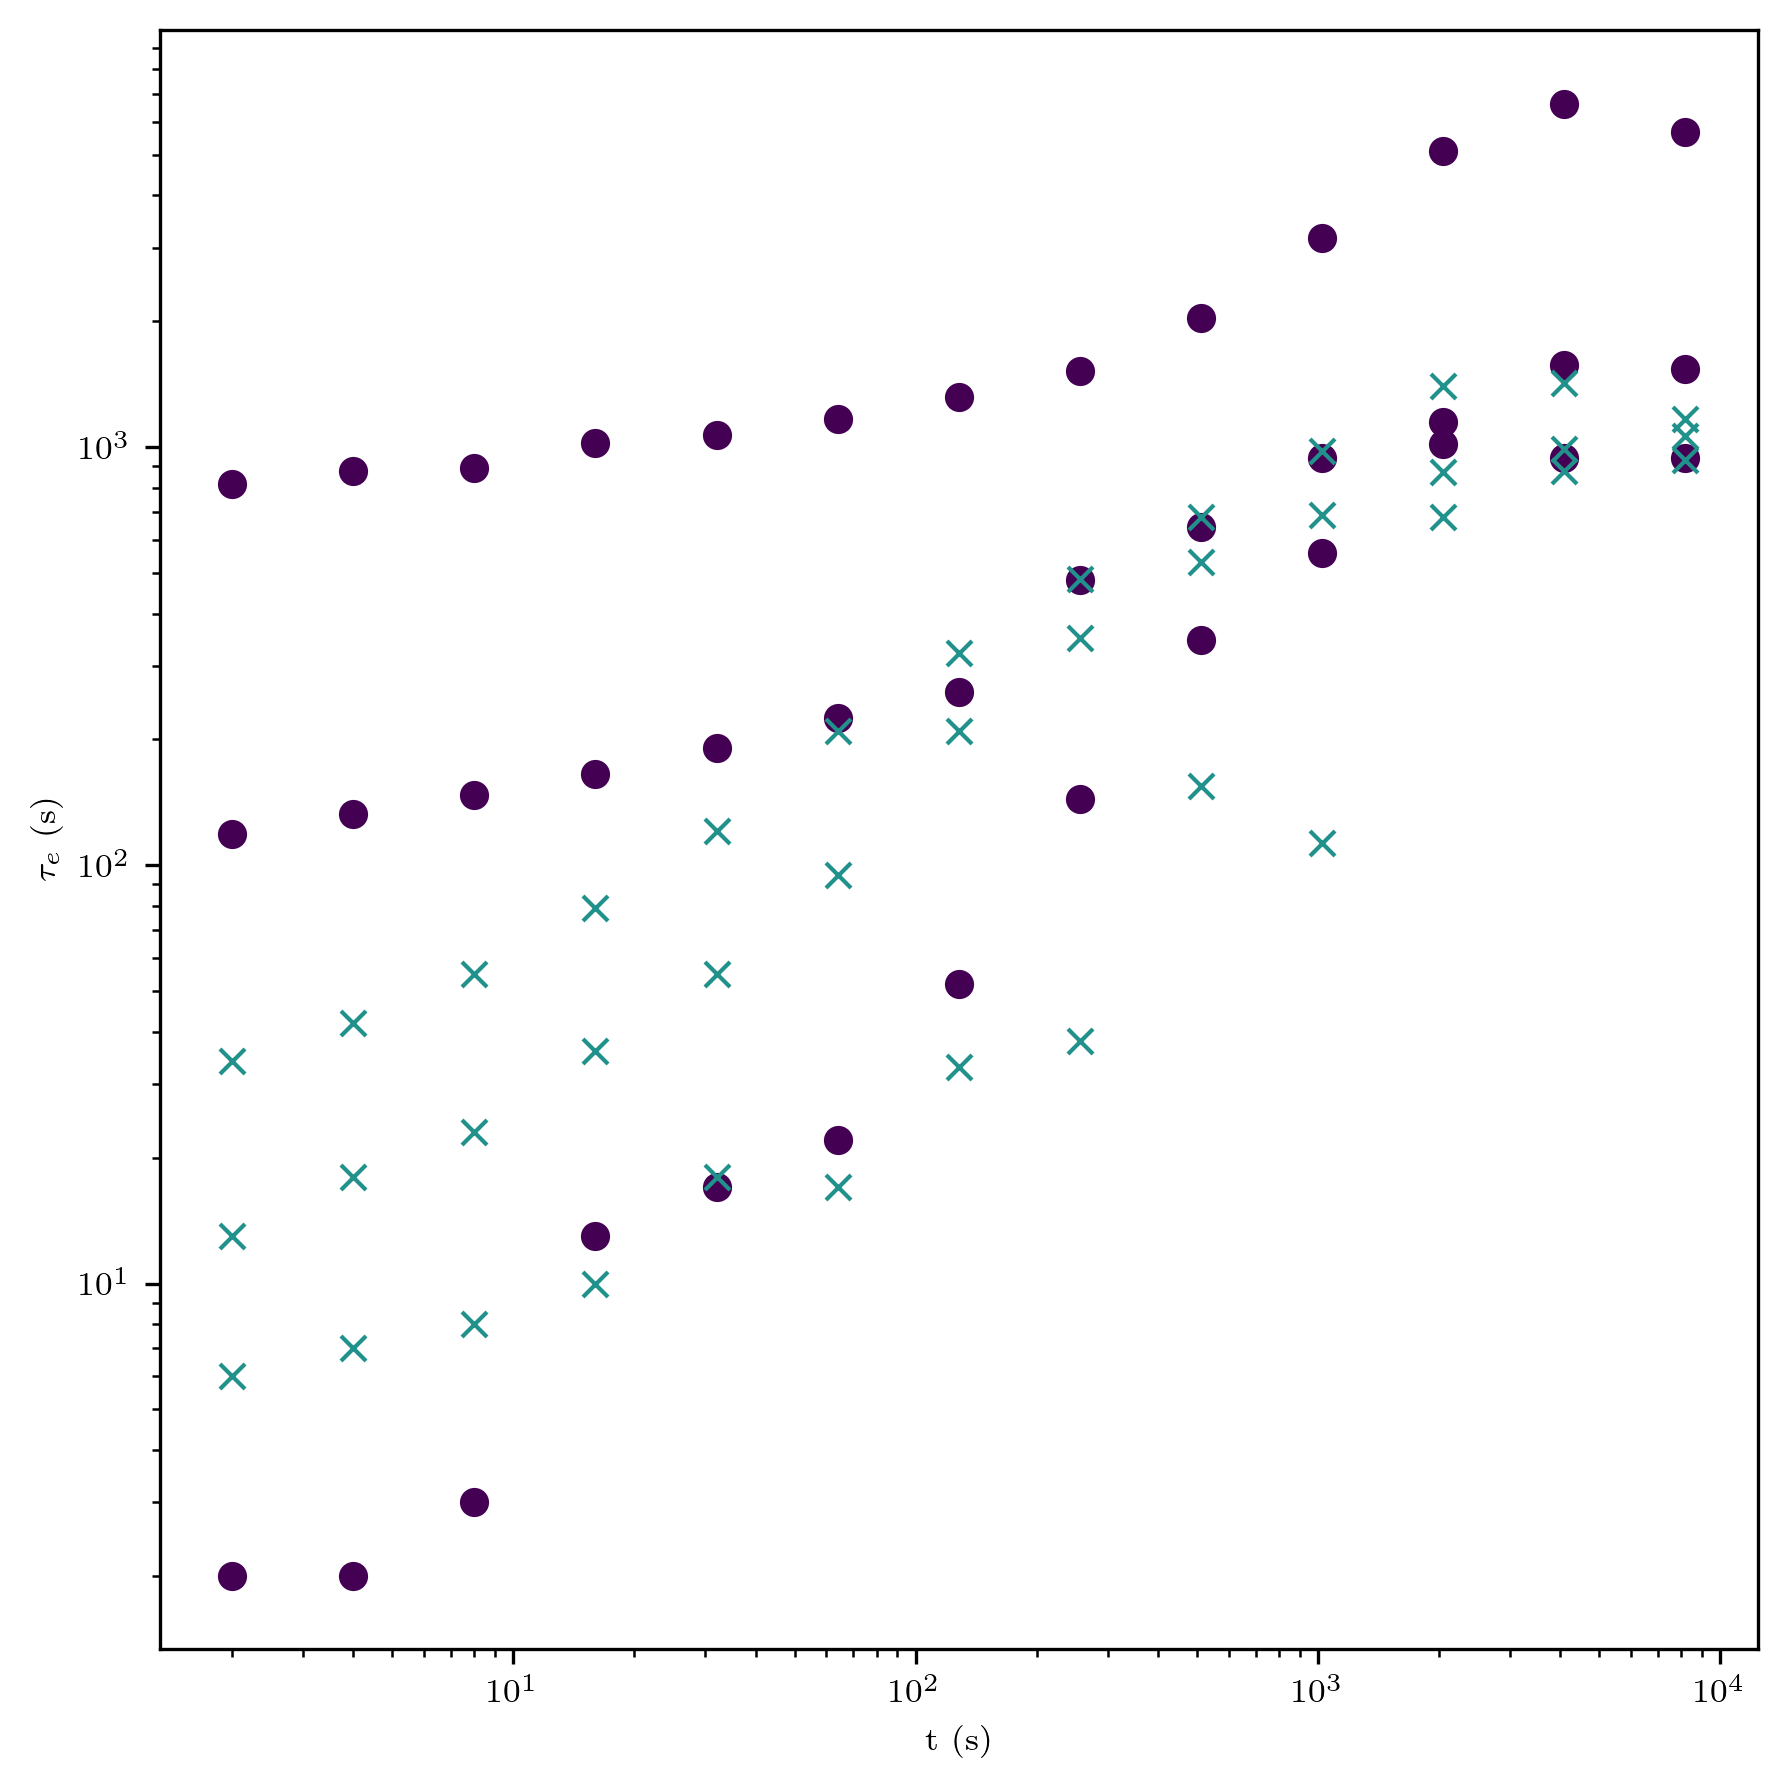

In [72]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)

t = (np.logspace(1, 13, num=13, base=2))



color=iter(cm.viridis(np.linspace(0,1,3)))

c=next(color)
ax1.plot(t,CrushedSilica_May142021_A_tau,'o',color = c)
ax1.plot(t,CrushedSilica_May142021_B_tau,'o',color = c)
ax1.plot(t,CrushedSilica_May142021_C_tau,'o',color = c)
###################################################################################################################
c=next(color)
ax1.plot(t,Flour_May252021_A_tau,'x',color = c)
ax1.plot(t,Flour_May252021_B_tau,'x',color = c)
ax1.plot(t,Flour_May252021_C_tau,'x',color = c)

# ax1.set_title('relaxation timescale: bustelo')
ax1.set_xlabel('t (s)')
ax1.set_ylabel(r'$\tau_e$ (s)')
ax1.set_xscale('log')
ax1.set_yscale('log')
# plt.xlim([1e-1,1e4])
# plt.ylim([1e-1,1e4])
plt.tight_layout()

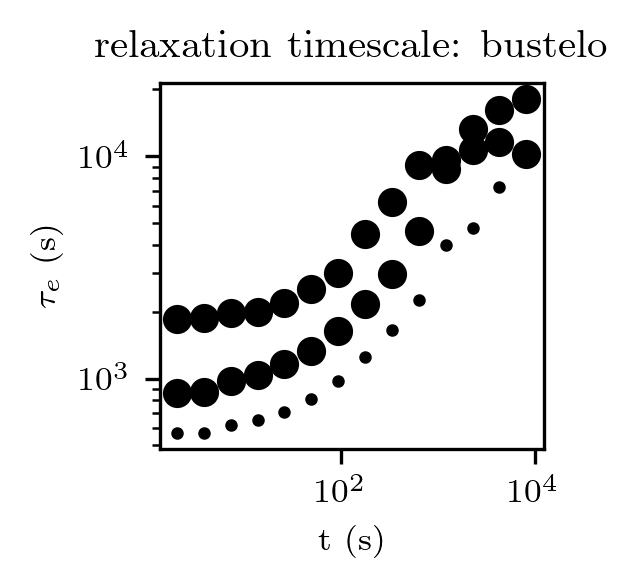

In [161]:
fig = plt.figure(figsize=(2, 2))
ax1 = plt.subplot(111)

t = (np.logspace(1, 13, num=14, base=2))

ax1.plot(t,Bustelo_May192021_A_t_efold_fit,'ko',markersize = 2)
ax1.plot(t,Bustelo_May192021_B_t_efold_fit,'ko')
ax1.plot(t,Bustelo_May192021_C_t_efold_fit,'ko')

# ax1.plot(t,GlassBeads_May132021_A_t_efold,'o',label = labels[i],markeredgecolor = 'k',markersize = 1)
# ax1.plot(t,GlassBeads_May132021_B_t_efold,'o',label = labels[i],markeredgecolor = 'k',markersize = 1)
# ax1.plot(t,GlassBeads_May132021_C_t_efold,'o',label = labels[i],markeredgecolor = 'k',markersize = 1)

ax1.set_title('relaxation timescale: bustelo')
ax1.set_xlabel('t (s)')
ax1.set_ylabel(r'$\tau_e$ (s)')
ax1.set_xscale('log')
ax1.set_yscale('log')
# plt.xlim([1e-1,1e4])
# plt.ylim([1e-1,1e4])
plt.tight_layout()

## Glass Beads

In [119]:
GlassBeads_May132021_A_t_efold_fit = t_efold_fit(GlassBeads_May132021_A_correlation_means)
GlassBeads_May132021_B_t_efold_fit = t_efold_fit(GlassBeads_May132021_B_correlation_means)
GlassBeads_May132021_C_t_efold_fit = t_efold_fit(GlassBeads_May132021_C_correlation_means)

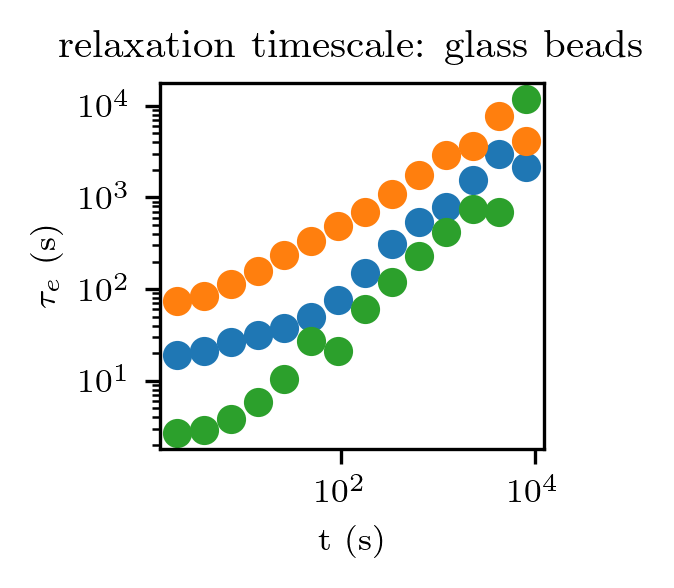

In [159]:
fig = plt.figure(figsize=(2, 2))
ax1 = plt.subplot(111)

t = (np.logspace(1, 13, num=14, base=2))

ax1.plot(t,GlassBeads_May132021_A_t_efold_fit,'o')
ax1.plot(t,GlassBeads_May132021_B_t_efold_fit,'o')
ax1.plot(t,GlassBeads_May132021_C_t_efold_fit,'o')

ax1.set_title('relaxation timescale: glass beads')
ax1.set_xlabel('t (s)')
ax1.set_ylabel(r'$\tau_e$ (s)')
ax1.set_xscale('log')
ax1.set_yscale('log')
# plt.xlim([1e-1,1e4])
# plt.ylim([1e-1,1e4])
plt.tight_layout()

## Determining the power of the timescale growth

In [ ]:
from scipy.optimize import curve_fit

a = np.min(tau[0:12])

def powerlaw(x,power):
    return a*(x**power)

fig = plt.figure(figsize=(6, 2))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

#use these data to fit to the timescale extracted from the exponential fit
t = (np.logspace(1, 13, num=14, base=2))
xdata = t[6:15]
ydata = tau[6:15]

#use these data to fit to intersection
# xdata = t[0:10]
# ydata = t_efold[0:10]

parameters, parameterscov = curve_fit(powerlaw, xdata, ydata)#, bounds=(0,1))

y_fit = powerlaw(xdata,*parameters)

ax1.plot(xdata,ydata,'ok', linewidth = 3,label = 'observations')
ax1.plot(xdata,y_fit,'r', linewidth = 3,label = 'fit')

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel('time')
ax1.set_ylabel('G')
ax1.set_title('observations vs. fit')
ax1.legend()

ax2.plot(xdata,ydata-y_fit,'ko',alpha = 0.7, markersize = 2)
ax3.plot(ydata,ydata-y_fit,'ko',alpha = 0.7, markersize = 2)

plt.tight_layout()

In [ ]:
residuals = ydata - powerlaw(xdata,*parameters)
## residual sum of squares
ss_res = np.sum(residuals**2)
# total sum of squares
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared 

In [ ]:
parameters[0]

In [ ]:
fig = plt.figure(figsize=(2, 2))

ax1 = plt.subplot(1, 1, 1)

t = np.logspace(1, 13, num=13, base=2)

y = 20*t**(parameters[0])

color=iter(cm.viridis(np.linspace(0,1,13)))

for i in range(len(tau)-1):
    c=next(color)
    ax1.plot(t[i],tau[i],'o',color = c,markeredgecolor='k',markersize = 8)


# ax1.plot(xdata,y_fit,'--k', linewidth = 3,label = 'fit')
# ax1.annotate('m = 0.53', xy=(100, 500), xytext=(1, 1200),fontsize = 8)
    
ax1.set_xlabel('t (s)')
ax1.set_ylabel(r'$\tau_{e}$ (s)');
# ax1.set_xlim([.1e0,1e6])
# ax1.set_ylim([1e1,1e4])
ax1.set_xscale('log')
ax1.set_yscale('log')

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/timescale_powerlaw_growth.png',bbox_inches='tight')

## Andrade rate fit

In [ ]:
l = 3.3 * 100000
c = ((8*np.pi)*(np.sqrt(2/5))*l)/633
G = 1/np.exp(1)
ϵ_efold = -(np.log(G)/c) 

#This is is the strain value that is equivalent to 1/e G

andrade_rates = ϵ_efold / tau

In [ ]:
fig = plt.figure(figsize=(2, 2))
labels = (list(np.logspace(1, 13, num=13, base=2)))
# x = np.arange(1,300,1)
# y =  100*(x**(3/5))
# plt.plot(x,y,'k')
t = (np.logspace(1, 13, num=13, base=2))
color=iter(cm.viridis(np.linspace(0,1,13)))
for i in range(len(t_efold)):
    c=next(color)
    plt.plot(t[i],andrade_rates[i],'o',label = labels[i],markeredgecolor = 'k',color = c,markersize = 5)
# plt.title('relaxation timescale')
plt.xlabel('t (s)')
plt.ylabel(r'$ \dot{\epsilon}$ (s$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,1e5])
plt.ylim([1e-7,1e-5])
plt.tight_layout()
# plt.savefig('e_foldingtime_loglog.png', bbox_inches='tight')

In [ ]:
from scipy.optimize import curve_fit

# a = np.min(andrade_rates)

def powerlaw(x,power,a):
    return a*(x**-power)

fig = plt.figure(figsize=(6, 2))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

t = (np.logspace(1, 13, num=13, base=2))

#use these data to fit to the timescale extracted from the exponential fit
xdata = t
ydata = andrade_rates

#use these data to fit to intersection
# xdata = t[0:9]
# ydata = t_efold[0:9]

parameters, parameterscov = curve_fit(powerlaw, xdata, ydata)#, bounds=(0,1))

y_fit = powerlaw(xdata,*parameters)

ax1.plot(xdata,ydata,'ok', linewidth = 3,label = 'observations')
ax1.plot(xdata,y_fit,'r', linewidth = 3,label = 'fit')

ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.set_xlim([1e-1,1e5])
# ax1.set_ylim([1e-7,1e-5])

ax1.set_xlabel('time')
ax1.set_ylabel('G')
ax1.set_title('observations vs. fit')
ax1.legend()

ax2.plot(xdata,ydata-y_fit,'ko',alpha = 0.7, markersize = 2)
ax3.plot(ydata,ydata-y_fit,'ko',alpha = 0.7, markersize = 2)

plt.tight_layout()

In [ ]:
parameters[0]

In [ ]:
fig = plt.figure(figsize=(2, 2))
labels = (list(np.logspace(1, 13, num=13, base=2)))
# x = np.arange(1,300,1)
# y =  100*(x**(3/5))
# plt.plot(x,y,'k')
t = (np.logspace(1, 13, num=13, base=2))
color=iter(cm.viridis(np.linspace(0,1,13)))
for i in range(len(t_efold)):
    c=next(color)
    plt.plot(t[i],andrade_rates[i],'o',label = labels[i],markeredgecolor = 'k',color = c,markersize = 8)
# plt.title('relaxation timescale')

plt.plot(xdata,y_fit,'--k', linewidth = 3,label = 'fit')
# plt.annotate('m = 0.50', xy=(1e-6, 1e-7), xytext=(1, 1200),fontsize = 8)


plt.title('power-law creep rate decay')
plt.xlabel('t (s)')
plt.ylabel(r'$ \dot{\epsilon}$ (s$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,1e5])
plt.ylim([1e-7,1e-5])
# plt.tight_layout()
# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/andrade_rates.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(4, 4))

ax1 = plt.subplot(1, 1, 1)

n = 13
t = np.arange(1, 1001,1)

color=iter(cm.viridis_r(np.linspace(0,1,n)))

for i in reversed(range(n)):
    c=next(color)
    ax1.plot(t/tau[i],gp[i],'o',color = c)

ax1.set_title('scaled relaxation')
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r'$ \tau / \tau_e  $')
ax1.set_ylabel(r'$ \langle G \rangle$');
# ax1.set_ylim([0,1.5]);

##################################################################################################################
x = np.arange(0.001,20,.001)
y1 = np.exp((-x))
y2 = np.exp((-x)**3/2)
y3 =((-x)**5)


ax1.plot(x,y1,'--r',label = 'exponential')
ax1.plot(x,y2,'--b',label = 'stretched exponential, b = 3/2')
# ax1.plot(x,y3,'--k',label = 'power-law')

##################################################################################################################
ax1.legend()
# plt.savefig('relaxation_stretchedvsnormalexp.png')

In [ ]:
from matplotlib.pyplot import cm
a = np.logspace(1, 13, num=13, base=2)
# a = a*10/60
labels = list(a)

color=iter(cm.inferno_r(np.linspace(0,1,13)))
time = np.arange(1,1001,1)

x = np.arange(0.001,20,.001)
y1 = np.exp((-x))



fig = plt.figure(figsize=(3, 2))
ax1 = plt.subplot(111)


for t in range(13):
    c=next(color)
    ax1.plot(time/tau[t],gp[t],'o',color = c,markersize = 3,alpha = 1,label = int(labels[t]))
ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_xlim([0,1e6])

ax1.plot(x,y1,'--r')#,label = 'exponential decay')


ax1.set_xlabel(r'$ \tau $ (s)')
ax1.set_ylabel(r'$ \langle G \rangle$')
box = ax1.get_position()
lgd = ax1.legend()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))


# plt.tight_layout()
plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/decorrelation_b.png', bbox_inches='tight')

## Ensemble relaxation -- Figure 2. 

In [ ]:
from matplotlib.pyplot import cm

fig = plt.figure(figsize=(6,2))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

fs = 7

################################################################################################################
color=iter(cm.viridis(np.linspace(0,1,13)))

for t in range(13):
    c=next(color)
    ax1.plot(gp[t],'o',color = c,markersize = 2.5)

ax1.set_ylim([0,1.05])
ax1.set_xscale('log')
ax1.set_xlabel(r'$ \tau (s)$',fontsize = fs)
ax1.set_ylabel(r'$ \langle G \rangle$',fontsize = fs,rotation = 'horizontal')
ax1.yaxis.set_ticks([0,.5,1])
ax1.yaxis.set_label_coords(-0.025,1.01)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.xaxis.set_ticks([1,10,100,1000])
################################################################################################################
t = np.arange(1, 1001)
color=iter(cm.viridis_r(np.linspace(0,1,n)))

for i in reversed(range(n)):
    c=next(color)
    ax2.plot(t/tau[i],gp[i],'o',color = c,markersize = 2.5)

ax2.set_ylim([0,1.05])
    
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.yaxis.set_ticks([])
ax2.set_xscale('log')

ax2.set_xticks([1e-5,1e-3,1e-1,1e1])
ax2.set_xlabel(r'$ \tau / \tau_e  $', fontsize = fs)

#showing the stretched exponential form
x = np.arange(0.001,20,.001)
y = np.exp((-x))
ax2.plot(x,y,'--r',label = 'exponential')
# ax2.plot(x,y,'r',linewidth = 2,label = r'$u/u_0 = e^{-z/\lambda}$')
# ax2.legend(frameon = False,loc = "lower left")
###############################################################################################################
t = (np.logspace(1, 13, num=13, base=2))
labels = list(np.logspace(1, 13, num=13, base=2))
color=iter(cm.viridis(np.linspace(0,1,13)))

for i in range(len(tau)):
    c=next(color)
    ax3.plot(t[i],tau[i],'o',markeredgecolor = 'k',color = c,markersize = 6,label = int(labels[i]))
    
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim([.1e0,1e6])
ax3.set_ylim([1e1,1e4])
ax3.set_xticks([1e-1,1e2,1e5])
ax3.set_yticks([1e1,1e4])

ax3.set_ylabel(r'$\tau_e$ (s)',fontsize = fs,rotation = 'horizontal')
ax3.yaxis.set_label_coords(0.1,1.01)
ax3.set_xlabel('t (s)',fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.yaxis.tick_right()

lg = ax3.legend(title = 'start time (s)',ncol =2,loc='center left', frameon = False, bbox_to_anchor=(1, 0.5),fontsize = 6)

# plt.tight_layout()
#################################################################################################################
fig.set_size_inches(7, 2.5)
plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/figure3_glassyrelaxation_v1.png',bbox_inches='tight')

# Profiles

Images from experiments are acquired from a level perspective - in order to measure surface-normal velocity/strain profiles, the images must be rotated by the angle of repose and cropped to a region of interest.

## Rotating images

In [ ]:
from skimage import transform

a = correlation_maps[0][3]
a[a <= 0] = 0

masked_map = ma.masked_array(a, mask=mask)
img = masked_map

y_min = 70
y_max = 100 
x_min = 150
x_max = 200
rotation_angle = 27

rotated_test = transform.rotate(img,rotation_angle,preserve_range = True,resize = True)
rotated_mask = transform.rotate(mask,rotation_angle,preserve_range = True,resize = True)
rotated_masked_image = ma.masked_array(rotated_test,mask = rotated_mask) 

roi_verts = [[y_max,x_max],[y_min,x_max],[y_min, x_min], [y_max, x_min]]
roi_verts.append(roi_verts[0])
x_roi, y_roi = zip(*roi_verts) 

cropped_rows = rotated_test[y_min:y_max,x_min:x_max].shape[0]

plt.subplot(1,3,1)
plt.imshow(img,vmin = 0.5,vmax = 1,cmap = 'inferno')
# plt.fill(x1,y1,'w',alpha = 1,edgecolor = 'k') 
plt.xlim([0,180])
plt.axis('off')

plt.title('unrotated image')
plt.subplot(1,3,2)
plt.imshow(rotated_masked_image,vmin = 0.5,vmax = 1,cmap = 'inferno')
plt.fill(y_roi,x_roi,'w',alpha = .3,edgecolor = 'k') 
plt.axis('scaled')
plt.title('rotated image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(rotated_test[y_min:y_max,x_min:x_max],vmin = 0.5,vmax = 1,cmap = 'inferno')
plt.title('cropped and rotated image image')

plt.axis('off')

plt.tight_layout()


# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/depth_profile.png', bbox_inches='tight')

In [ ]:
plt.imshow(rotated_masked_image,vmin = 0.5,vmax = 1,cmap = 'inferno')
plt.fill(y_roi,x_roi,'w',alpha = .5,edgecolor = 'k') 
plt.axis('scaled')
# plt.title('rotated image')
plt.axis('off')
plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/rotated_ROI.png', bbox_inches='tight')

## Computing depth-averaged quantities

In [ ]:
def depth_average(correlation_map):
    x = len(correlation_map)
    timestep = len(correlation_map)
    
    G_mean_depth_averaged = [[] for _ in range(x)]
    G_var_depth_averaged = [[] for _ in range(x)]
    
    ROI_average = []
    ROI_var = []
    
    # this loop
    for t in range(timestep-1):
        
        G_map_temp = correlation_map[t]
        G_map_rotated = transform.rotate(G_map_temp,rotation_angle,preserve_range = True,resize = True)
        G_map_cropped = np.asarray(G_map_rotated[y_min:y_max,x_min:x_max])
        
        cropped_rows = G_map_cropped.shape[0]
        cropped_columns = G_map_cropped.shape[1]
        cropped_area = cropped_rows*cropped_columns
        
        ROI_average.append(np.nanmean(G_map_cropped))
        ROI_var.append(np.nanvar(G_map_cropped))
        
        G_mean_temp = []
        G_var_temp = []
        
        for i in range(cropped_rows):
            G_mean_temp.append(np.nanmean(G_map_cropped[i][:]))
            G_var_temp.append(np.nanvar(G_map_cropped[i][:]))
            
        G_mean_depth_averaged[t] = G_mean_temp
        G_var_depth_averaged[t] = G_var_temp
        
        del G_map_temp,G_map_rotated,G_map_cropped,G_mean_temp,G_var_temp

    return G_mean_depth_averaged,G_var_depth_averaged,ROI_average,ROI_var

## A loop to calculate ROI - depth averaged quantities for all start times

In [ ]:
x = 13

mean_depth_avg = [[] for _ in range(x)]
var_depth_avg = [[] for _ in range(x)]
ROI_mean = [[] for _ in range(x)]
ROI_var = [[] for _ in range(x)]

for t in range(13):
    mean_depth_avg[t],var_depth_avg[t],ROI_mean[t],ROI_var[t] = depth_average(correlation_maps[t])

In [ ]:
from matplotlib.pyplot import cm

fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

####################################################################################################################
a = np.logspace(1, 13, num=13, base=2)
# a = a*10/60
labels = list(a)

color=iter(cm.viridis(np.linspace(0,1,13)))
time = np.arange(1,1000,1)

for t in range(13):
    c=next(color)
    ax1.plot(time,ROI_mean[t],'o',color = c,markersize = 3,alpha = 1
             ,label = int(labels[t]))
ax1.set_xlabel(r'$ \tau $ (s)')
ax1.set_ylabel(r'$ \langle G \rangle$ - ROI')
ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_xlim([0,1e6])
###################################################################################################################
color=iter(cm.viridis(np.linspace(0,1,13)))

for t in range(13):
    c=next(color)
    ax2.plot(time,ROI_var[t],'o',color = c,markersize = 3,alpha = 1
             ,label = int(labels[t]))
ax2.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_xlim([0,1e6])

ax2.set_xlabel(r'$ \tau $ (s)')
ax2.set_ylabel('variance - ROI')
box = ax2.get_position()
lgd = ax2.legend()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax2.legend(title = 'start time (s)',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5))


plt.tight_layout()
# plt.savefig('strain_growth_time.png', bbox_inches='tight')

## Creating variables to correctly scale depth

In [ ]:
# this is the depth, in metapixels
z = np.arange(.5,(y_max-y_min),1)
#depth in pixels
z = z*10
#depth in meters
z = z*3.6e-5

In [ ]:
l = 3.3 * 100000
c = ((8*np.pi)*(np.sqrt(2/5))*l)/633

profile_t2_0 = -(np.log(np.asarray(mean_depth_avg[0][0]))/c) 
profile_t2_2 = -(np.log(np.asarray(mean_depth_avg[0][2]))/c) 
profile_t2_4 = -(np.log(np.asarray(mean_depth_avg[0][4]))/c) 
profile_t2_6 = -(np.log(np.asarray(mean_depth_avg[0][6]))/c) 
profile_t2_8 = -(np.log(np.asarray(mean_depth_avg[0][8]))/c) 

profile_t2048_0 = -(np.log(np.asarray(mean_depth_avg[10][0]))/c) 
profile_t2048_200 = -(np.log(np.asarray(mean_depth_avg[10][200]))/c) 
profile_t2048_400 = -(np.log(np.asarray(mean_depth_avg[10][400]))/c) 
profile_t2048_600 = -(np.log(np.asarray(mean_depth_avg[10][600]))/c) 
profile_t2048_800 = -(np.log(np.asarray(mean_depth_avg[10][800]))/c) 

In [ ]:
fig = plt.figure(figsize=(6,3))

plt.style.use('dark_background')


ax1 = plt.subplot(121)
ax1.plot(profile_t2_0,z,'yo',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 0 s')
ax1.plot(profile_t2_2,z,'go',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 2 s')
ax1.plot(profile_t2_4,z,'bo',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 4 s')
ax1.plot(profile_t2_6,z,'ro',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 6 s')
ax1.plot(profile_t2_8,z,'mo',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 8 s')
ax1.invert_yaxis()
# ax1.set_title('strain profiles: early time')
ax1.set_xlabel(r'$\langle \epsilon \rangle$')
ax1.set_ylabel('depth (m)')
ax1.legend(title = 'start time = 2s',frameon = False)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

ax2 = plt.subplot(122)
ax2.plot(profile_t2048_0,z,'yo',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 0 s')
ax2.plot(profile_t2048_200,z,'go',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 200 s')
ax2.plot(profile_t2048_400,z,'bo',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 400 s')
ax2.plot(profile_t2048_600,z,'ro',markersize = 7,markeredgecolor = 'k',label=r'$\tau$ = 600 s')
ax2.plot(profile_t2048_800,z,'mo',markersize = 7,markeredgecolor = 'k',label=r'$\tau$= 800 s')
# ax2.set_title('strain profiles: late time')
ax2.invert_yaxis()
ax2.set_xlabel(r'$\langle \epsilon \rangle$')
# ax2.set_ylabel('depth (m)')
ax2.legend(title = 'start time = 2048s',frameon = False)
ax2.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Latin Modern Math']})
# plt.rcParams['pdf.fonttype'] = 42

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/depth_profile.png', bbox_inches='tight')

In [ ]:
np.savez('profiles_t2',data1 = z, data2 = profile_t2_0, data3 = profile_t2_2, data4 = profile_t2_4, data5 = profile_t2_6,data6 = profile_t2_8)

In [ ]:
np.savez('profiles_t2048',data1 = z, data2 = profile_t2048_0, data3 = profile_t2048_200, data4 = profile_t2048_400, data5 = profile_t2048_600,data6 = profile_t2048_800)

## ROI snapshots for both profiles

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(2,2))
ax1 = plt.subplot(111)

l = 3.3 * 100000
c = ((8*np.pi)*(np.sqrt(2/5))*l)/633

snapshot = rotated_test[y_min:y_max,x_min:x_max]
snapshot = -(np.log(snapshot)/c) 

im1 = ax1.imshow(snapshot,vmin = 1e-7,vmax = 1.5e-5,cmap = 'gray_r')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical',format='%.0e')
# cax.tick_params(labelsize=15) 
cax.set_title(r'$ \dot{\epsilon}$',fontsize = 10)

ax1.set_xticks([])
# ax1.set_yticks([])
# plt.axis('off')

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Latin Modern Math']})
plt.rcParams['pdf.fonttype'] = 42

plt.tight_layout()
# plt.savefig('depth_profile_snapshot.svg', bbox_inches='tight')

## Fitting with scipy.optimize

In [ ]:
def normalize_profile(profile):
    # this gives a normalized profile
    profile_norm = profile/np.max(profile)
    profile_min = np.min(profile_norm)
    normalized = (profile_norm - profile_min)/(1-profile_min)
    return normalized

In [ ]:
norm = normalize_profile(profile_t2_8)

In [ ]:
from scipy.optimize import curve_fit

def func(z, l):
    return np.exp(-z/l)

x = z
y = (profile_t2_8/np.max(profile_t2_8))
y_norm = norm

popt, pcov = curve_fit(func, x, y)
popt_norm, pcov_norm = curve_fit(func, x, y_norm)

In [ ]:
fig = plt.figure(figsize=(6,3))

ax1 = plt.subplot(121)

ax1.plot(x, y, 'o', label="Normalized data")
ax1.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
ax1.set_ylabel(r'$ \dot{\epsilon} / \dot{\epsilon_0} $')
ax1.set_xlabel('depth(m)')
# ax1.set_yscale('log')
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(x, y_norm, 'o', label="Normalized Data - min")
ax2.plot(x, func(x, *popt_norm), 'r-', label="Fitted Curve")
ax2.set_ylim([0,1])
ax2.set_ylabel(r'$ (\dot{\epsilon} / \dot{\epsilon_0}) - min (\dot{\epsilon}) $')
ax2.set_xlabel('depth(m)')
# ax2.set_yscale('log')

ax2.legend()

# plt.savefig('profiles_linlog.png', bbox_inches='tight')

In [ ]:
def goodness_of_fit(xdata,ydata,popt):
    residuals = ydata - func(xdata,*popt)
    ## residual sum of squares
    ss_res = np.sum(residuals**2)
    # total sum of squares
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    r_squared 
    return r_squared

In [ ]:
r_2_DWS = goodness_of_fit(x, y,popt_DWS)
r_2_DWS

# Ensemble plot

In [ ]:
from matplotlib.pyplot import cm

#(figsize=(3.5,6))
fig = plt.figure(figsize=(5,2.5))
ax1 = plt.subplot(121)
ax3 = plt.subplot(122)

fs = 10

################################################################################################################
color=iter(cm.viridis(np.linspace(0,1,13)))

for t in range(13):
    c=next(color)
    ax1.plot(means_undisturbed[t],'o',color = c,markersize = 3)

ax1.set_xscale('log')
# ax1.set_yscale('log')

# ax1.set_xlabel(r'$ \tau (s)$',fontsize = fs)
ax1.set_ylabel(r'$ \langle G \rangle$',fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
################################################################################################################
left, bottom, width, height = [0.20, 0.60, 0.20, 0.10]
ax2 = fig.add_axes([left, bottom, width, height])

t = np.arange(1, 1001)
color=iter(cm.viridis_r(np.linspace(0,1,n)))

for i in reversed(range(n)):
    c=next(color)
    ax2.plot(t/tau[i],gp[i],'o',color = c,markersize = 2)
    
ax2.yaxis.set_ticks([0,1])
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.yaxis.set_label_coords(-0.025,1.05)

# ax2.xaxis.set_ticks([0,1e2])
# ax2.set_xlim([1e-3,1e2])

ax2.set_xscale('log')
ax2.set_xlabel(r'$ \tau / \tau_e  $')
ax2.set_ylabel(r'$ \langle G \rangle$',rotation = 'horizontal')
################################################################################################################
t = (np.logspace(1, 13, num=13, base=2))

labels = list(np.logspace(1, 13, num=13, base=2))

color=iter(cm.viridis(np.linspace(0,1,13)))

for i in range(len(tau)):
    c=next(color)
    ax3.plot(t[i],tau[i],'o',markeredgecolor = 'k',color = c,markersize = 6,label = int(labels[i]))
    
ax3.set_xscale('log')
ax3.set_yscale('log')

ax3.set_ylim([5e0,1e6])
ax3.set_xlim([1e0,1e6])

ax3.set_ylabel(r'$\tau_e$ (s)',fontsize = fs)
ax3.set_xlabel('t (s)',fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)

# lg = ax3.legend(title = 'waiting time',loc='lower right', frameon =False,fontsize = 7)
lg = ax3.legend(title = 'start time',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5),fontsize = 7)
title = lg.get_title()
title.set_fontsize(10)

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Palatino']})
# plt.rcParams['pdf.fonttype'] = 42

# plt.savefig('relaxation_combined.pdf', bbox_inches='tight')

In [ ]:
from matplotlib.pyplot import cm

#(figsize=(3.5,6))
fig = plt.figure(figsize=(5,2.5))
ax1 = plt.subplot(121)
ax3 = plt.subplot(122)

fs = 10

################################################################################################################
color=iter(cm.viridis(np.linspace(0,1,13)))

for t in range(13):
    c=next(color)
    ax1.plot(means_undisturbed[t],'o',color = c,markersize = 3)

ax1.set_xscale('log')
# ax1.set_yscale('log')

# ax1.set_xlabel(r'$ \tau (s)$',fontsize = fs)
ax1.set_ylabel(r'$ \langle G \rangle$',fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
################################################################################################################
left, bottom, width, height = [0.17, 0.23, 0.10, 0.20]
ax2 = fig.add_axes([left, bottom, width, height])

t = np.arange(1, 1001)
color=iter(cm.viridis_r(np.linspace(0,1,n)))

for i in reversed(range(n)):
    c=next(color)
    ax2.plot(t/tau[i],gp[i],'o',color = c,markersize = 2)
    
ax2.yaxis.set_ticks([0,1])
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.yaxis.set_label_coords(-0.025,1.05)
ax2.xaxis.set_label_coords(1.2,-.15)

# ax2.xaxis.set_ticks([0,1e2])
# ax2.set_xlim([1e-3,1e2])

ax2.set_xscale('log')
ax2.set_xlabel(r'$ \tau / \tau_e  $')
ax2.set_ylabel(r'$ \langle G \rangle$',rotation = 'horizontal')
################################################################################################################
labels = list(np.logspace(1, 13, num=13, base=2))
t = (np.logspace(1, 13, num=13, base=2))


color=iter(cm.viridis(np.linspace(0,1,13)))

for i in range(len(tau)):
    c=next(color)
    ax3.plot(t[i],tau[i],'o',markeredgecolor = 'k',color = c,markersize = 6,label = int(labels[i]))
    
ax3.set_xscale('log')
ax3.set_yscale('log')

ax3.set_xlim([1e-1,5e4])
ax3.set_ylim([1e1,1e4])

    
y = 20*t**(parameters[0])
ax3.plot(t,y,'--k')
ax3.annotate('m = 0.53', xy=(100, 500), xytext=(7, 1200),fontsize = 8)    

# ax3.set_ylabel(r'$\tau_e$ (s)',fontsize = fs)
ax3.set_xlabel('t (s)',fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
# lg = ax3.legend(title = 'waiting time', frameon =False,fontsize = 7)
# lg = ax3.legend(title = 'waiting time',loc='lower right', frameon =False,fontsize = 7)
# lg = ax3.legend(title = 'start time',loc='center left', frameon = False, bbox_to_anchor=(1, 0.5),fontsize = 7)


# title = lg.get_title()
# title.set_fontsize(10)

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Latin Modern Math']})
# plt.rcParams['pdf.fonttype'] = 42

# plt.tight_layout()


plt.savefig('relaxation.jpg', bbox_inches='tight')

In [ ]:
y = 20*t**(parameters[0])


color=iter(cm.viridis(np.linspace(0,1,13)))

for i in range(len(tau)-1):
    c=next(color)
    ax1.plot(t[i],tau[i],'o',color = c,markeredgecolor='k',markersize = 5)

ax1.plot(t,y,'--k')
ax1.annotate('m = 0.53', xy=(100, 500), xytext=(1, 1200),fontsize = 8)
    
ax1.set_xlabel('t')
ax1.set_ylabel(r'$\tau_{e}fit$');
ax1.set_xlim([.1e0,1e6])
ax1.set_ylim([1e1,1e4])
ax1.set_xscale('log')
ax1.set_yscale('log')


In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 6))
################################################################################################################
labels = list(np.logspace(1, 13, num=13, base=2))
n = 13
time = np.arange(1, 1001)
t = (np.logspace(1, 13, num=13, base=2))
color=iter(cm.viridis_r(np.linspace(0,1,n)))

for i in reversed(range(n)):
    c=next(color)
    ax1.plot(time,gp[i],'o',color = c,markersize = 8,alpha = 1,label = int(labels[i]))
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xlabel('τ / τ decay',fontsize = 10)
ax1.set_ylabel('G',fontsize = 10)
ax1.legend(title = 'start time (s)',frameon = True,loc='lower left',fontsize = 10 )        
################################################################################################################
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.75, 0.75, 0.2, 0.2]

ax2 = fig.add_axes([left, bottom, width, height])

color=iter(cm.viridis_r(np.linspace(0,1,n)))

for i in reversed(range(n)):
    c=next(color)
    ax2.plot(t[i],tau[i],'o',color = c,markersize = 3)
ax2.set_xscale('log')
ax2.set_xlabel('τ ')
ax2.set_ylabel('G')


################################################################################################################

# plt.xscale('log')
# plt.yscale('log')
# plt.tight_layout()
# plt.savefig('relaxation_a.png')

In [ ]:
fig = plt.figure(figsize=(2, 2))

t = (np.logspace(1, 13, num=13, base=2))
color=iter(cm.viridis(np.linspace(0,1,13)))

for i in range(len(t_efold)):
    c=next(color)
    plt.plot(t[i],t_efold[i],'o',markeredgecolor = 'k',color = c,markersize = 5)
plt.xlabel('start time (s)', fontsize=10)
plt.ylabel('relaxation time (s)', fontsize=10)

# plt.xscale('log')
# plt.yscale('log')

# plt.savefig('relaxation_b.png')

In [ ]:
import pylab as pl
import numpy as np

a = np.array([[1e-5,1e-7]])
pl.figure(figsize=(.25,3))
img = pl.imshow(a, cmap="gray_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cax.set_title(r'$\dot{\epsilon }$',fontsize = 24)
cax.tick_params(labelsize=10) 
pl.colorbar(orientation="vertical", cax=cax,format='%.0e',ticks = [1e-7,2.5e-6,5e-6,7.5e-6,1e-5])

pl.savefig("colorbar.png", bbox_inches='tight')

# Quadrupoles 

https://stackoverflow.com/questions/51485146/efficient-2d-cross-correlation-in-python

## Spatial correlation function

This is the main idea: we identify the centroid of each plastic event. Then, we take a slice in space (a region of interest) that encompasses the avalanche. Now we are interested in computing a spatial correlation function, which tells us how correlated other pixels in the ROI are to the avalanche centroid. 

Later on, we will calculate a length which is simply the euclidian distance separating avalanche centroids. Is this a correlation length? I don't think so.

Here I am trying to code the spatial correlation function, following some papers in the colloidal glass and elastoplastic literature; they are all generic to some degree, but I have seen there is some variety in the forms that they take. 

\begin{equation*}
C_{\epsilon{xy}}(\Delta r) = \frac{\left \langle (\epsilon_{xy}(r + \Delta r) - \left \langle \epsilon_{xy} \right \rangle) \right \rangle (\epsilon_{xy}(r) - \left \langle \epsilon_{xy} \right \rangle )}{\chi^2}
\end{equation*}


In [ ]:
### 2D Decorrelation

from skimage import transform

# a = correlation_maps[12][100]
a = finesand_March22_A_correlation_maps[3][1]
mask = finesand_March22_A_mask

a[a <= 0] = 0


l = 3.3 * 100000
c = ((8*np.pi)*(np.sqrt(2/5))*l)/633


masked_map = ma.masked_array(a, mask=mask)
masked_map = -(np.log(masked_map)/c) 
img = masked_map
mask = mask

y_min = 70
y_max = 150
x_min = 80
x_max = 160
rotation_angle = 27

rotated_test = transform.rotate(img,rotation_angle,preserve_range = True,resize = True)
rotated_mask = transform.rotate(mask,rotation_angle,preserve_range = True,resize = True)
rotated_masked_image = ma.masked_array(rotated_test,mask = rotated_mask) 

roi_verts = [[y_max,x_max],[y_min,x_max],[y_min, x_min], [y_max, x_min]]
roi_verts.append(roi_verts[0])
x_roi, y_roi = zip(*roi_verts) 

cropped_rows = rotated_test[y_min:y_max,x_min:x_max].shape[0]

plt.subplot(1,3,1)
plt.imshow(img,vmin = 1e-7,vmax = 1e-5,cmap = 'gray_r')
# plt.fill(x1,y1,'w',alpha = 1,edgecolor = 'k') 
plt.xlim([0,180])
plt.axis('off')
plt.title('unrotated image')

plt.subplot(1,3,2)
plt.imshow(rotated_masked_image,vmin = 1e-7,vmax = 1e-5,cmap = 'gray_r')
plt.fill(y_roi,x_roi,'w',alpha = .3,edgecolor = 'k') 
plt.axis('scaled')
plt.title('rotated image')
# plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(rotated_test[y_min:y_max,x_min:x_max],vmin = 1e-7,vmax = 1e-5,cmap = 'gray_r')
plt.title('cropped and rotated image image')

plt.axis('off')

plt.tight_layout()


# plt.savefig('profile_protocol.svg')


In [ ]:
plt.imshow(rotated_test[y_min:y_max,x_min:x_max],vmin = 1e-7,vmax = 1e-5,cmap = 'gray_r')
plt.axis('off')
# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/falklanger.png', bbox_inches='tight')

In [ ]:
z_tile = rotated_test[y_min:y_max,x_min:x_max]
z_tile = z_tile - np.mean(z_tile)

#take the fft
z_fft   = 1/np.shape(z_tile)[1]/np.shape(z_tile)[0]*np.fft.fft2(z_tile)
z_fft_r = (z_fft.real**2+z_fft.imag**2)**0.5
#shift high modes to the middle, erase the lowest modes
z_fft_s = np.fft.fftshift(z_fft_r)
#get autocorrelation of the topo data via the inverse of the fft
z_rft_s = np.fft.fftshift(np.fft.ifft2((z_fft)*np.conj((z_fft)))).real*np.shape(z_tile)[1]*np.shape(z_tile)[0]
z_rft_s = z_rft_s/np.var(z_tile)

x = np.arange(np.shape(z_tile)[0])-np.shape(z_tile)[0]/2
y = np.arange(np.shape(z_tile)[1])-np.shape(z_tile)[1]/2
X,Y = np.meshgrid(x,y) 

fig = plt.figure(figsize=(8,6))

ax1 = plt.subplot(111)

im1 = ax1.pcolormesh(X,Y,z_rft_s,cmap='rainbow')#,vmin=-1,vmax=1)
# ax2.set_title('2d correlation function')
ax1.set_aspect('1')    
ax1.set_xlim([-20,20])
ax1.set_ylim([-20,20])

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')#,format=ticker.FuncFormatter(fmt))
# cax.tick_params(labelsize=15) 
cax.set_title('C')#,fontsize = 10)

plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/single_quadrapole.png', bbox_inches='tight')

In [ ]:
def crop_rotate(a):
    a[a <= 0] = 0
    l = 3.3 * 100000
    c = ((8*np.pi)*(np.sqrt(2/5))*l)/633

    masked_map = ma.masked_array(a, mask=mask)
    masked_map = -(np.log(masked_map)/c) 
    img = masked_map


    y_min = 70
    y_max = 150
    x_min = 80
    x_max = 160
    rotation_angle = 27

    rotated_test = transform.rotate(img,rotation_angle,preserve_range = True,resize = True)
    rotated_mask = transform.rotate(mask,rotation_angle,preserve_range = True,resize = True)
    rotated_masked_image = ma.masked_array(rotated_test,mask = rotated_mask) 

    roi_verts = [[y_max,x_max],[y_min,x_max],[y_min, x_min], [y_max, x_min]]
    roi_verts.append(roi_verts[0])
    x_roi, y_roi = zip(*roi_verts) 

    cropped_rows = rotated_test[y_min:y_max,x_min:x_max].shape[0]
    
    return rotated_test[y_min:y_max,x_min:x_max]

z_tile_1 = crop_rotate(correlation_maps_dt[2][1])
z_tile_2 = crop_rotate(correlation_maps_dt[6][1])
z_tile_3 = crop_rotate(correlation_maps_dt[10][1])

def autocorrelate(z_tile):
    #subtracting the mean 
    z_tile = z_tile-np.mean(z_tile)
    #take the fft
    z_fft   = 1/np.shape(z_tile)[1]/np.shape(z_tile)[0]*np.fft.fft2(z_tile)
    z_fft_r = (z_fft.real**2+z_fft.imag**2)**0.5
    #shift high modes to the middle, erase the lowest modes
    z_fft_s = np.fft.fftshift(z_fft_r)
    #get autocorrelation of the topo data via the inverse of the fft
    z_rft_s = np.fft.fftshift(np.fft.ifft2((z_fft)*np.conj((z_fft)))).real*np.shape(z_tile)[1]*np.shape(z_tile)[0]
    z_rft_s = z_rft_s/np.var(z_tile)

    x = np.arange(np.shape(z_tile)[0])-np.shape(z_tile)[0]/2
    y = np.arange(np.shape(z_tile)[1])-np.shape(z_tile)[1]/2
    X,Y = np.meshgrid(x,y) 
    
    return z_rft_s,X,Y

c1 = autocorrelate(z_tile_1)
c2 = autocorrelate(z_tile_2)
c3 = autocorrelate(z_tile_3)



In [ ]:
fig = plt.figure(figsize=(6,2))
plt.style.use('dark_background')



ax1 = plt.subplot(131)
im1 = ax1.pcolormesh(c1[1],c1[2],c1[0],cmap='inferno')#,vmin = 0,vmax = 1)
# ax2.set_title('2d correlation function')
ax1.set_title("t = 8s")
ax1.set_aspect('1')    
ax1.set_xlim([-20,20])
ax1.set_ylim([-20,20])
ax1.set_xticks([-20,0,20])
ax1.set_yticks([-20,0,20])

ax1.set_ylabel('y [metapixels]')

# ax1.axis('off')

###############################################################################################################
ax2 = plt.subplot(132)
im2 = ax2.pcolormesh(c2[1],c2[2],c2[0],cmap='inferno')#,vmin=-1,vmax=1)
ax2.set_title('t = 128s')
# ax2.axis('off')
ax2.set_yticks([])
ax2.set_xticks([-20,0,20])

ax2.set_xlabel('x [metapixels]')


# ax2.set_title('2d correlation function')
ax2.set_xlim([-20,20])
ax2.set_ylim([-20,20])
###############################################################################################################
ax3 = plt.subplot(133)
im3 = ax3.pcolormesh(c3[1],c3[2],c3[0],cmap='inferno')#,vmin=-1,vmax=1)
ax3.set_title('t = 1028s')
ax3.set_yticks([])
ax3.set_xticks([-20,0,20])

# ax3.axis('off')

# ax2.set_title('2d correlation function')
ax3.set_xlim([-20,20])
ax3.set_ylim([-20,20])

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')#,format=ticker.FuncFormatter(fmt))
# cax.tick_params(labelsize=15) 
cax.set_title('C')#,fontsize = 10)



plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/quadrapole.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(6,2))
plt.style.use('dark_background')



ax1 = plt.subplot(131)
im1 = ax1.contour(c1[1],c1[2],c1[0],cmap='inferno')#,vmin = 0,vmax = 1)
im1 = ax1.contourf(c1[1],c1[2],c1[0],cmap='inferno')#,vmin = 0,vmax = 1)
# ax2.set_title('2d correlation function')
ax1.set_title("t = 8s")
ax1.set_aspect('1')    
ax1.set_xlim([-20,20])
ax1.set_ylim([-20,20])
ax1.set_xticks([-20,0,20])
ax1.set_yticks([-20,0,20])

ax1.set_ylabel('y [metapixels]')

# ax1.axis('off')

###############################################################################################################
ax2 = plt.subplot(132)
im2 = ax2.contour(c2[1],c2[2],c2[0],cmap='inferno')#,vmin=-1,vmax=1)
im2 = ax2.contourf(c2[1],c2[2],c2[0],cmap='inferno')#,vmin=-1,vmax=1)
ax2.set_title('t = 128s')
# ax2.axis('off')
ax2.set_yticks([])
ax2.set_xticks([-20,0,20])

ax2.set_xlabel('x [metapixels]')


# ax2.set_title('2d correlation function')
ax2.set_xlim([-20,20])
ax2.set_ylim([-20,20])
###############################################################################################################
ax3 = plt.subplot(133)
im3 = ax3.contour(c3[1],c3[2],c3[0],cmap='inferno')#,vmin=-1,vmax=1)
im3 = ax3.contourf(c3[1],c3[2],c3[0],cmap='inferno')#,vmin=-1,vmax=1)

ax3.set_title('t = 1028s')
ax3.set_yticks([])
ax3.set_xticks([-20,0,20])

# ax3.axis('off')

# ax2.set_title('2d correlation function')
ax3.set_xlim([-20,20])
ax3.set_ylim([-20,20])

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')#,format=ticker.FuncFormatter(fmt))
# cax.tick_params(labelsize=15) 
cax.set_title('C')#,fontsize = 10)



plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/quadrapole.png', bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(4,2))

ax1 = plt.subplot(1, 2, 1)
ax1.contourf(z_rft_s,cmap = 'inferno')
ax1.contour(z_rft_s,cmap = 'inferno')
# ax1.set_xlim([,15])
# ax1.set_ylim([-15,15])

ax2 = plt.subplot(1, 2, 2)
im2 = ax2.pcolormesh(X,Y,z_rft_s,cmap='inferno',vmin=-1,vmax=1)
# ax2.set_title('2d correlation function')
# ax2.set_xlim([-15,15])
# ax2.set_ylim([-15,15])

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')#,format=ticker.FuncFormatter(fmt))
# cax.tick_params(labelsize=15) 
cax.set_title('C')#,fontsize = 10)



plt.tight_layout()

# plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/hello.png', bbox_inches='tight')

from scipy import signal
from scipy import misc

frame = rotated_test[y_min:y_max,x_min:x_max]

corr = signal.correlate2d(frame, frame, boundary='wrap', mode='same')
corr = corr/np.var(frame)

plt.imshow(corr)
plt.xlim([29,50])
plt.ylim([29,50])

## Radial averages

In [ ]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

In [ ]:
radial_average = radial_profile(z_rft_s, (40,40))

In [ ]:
len(radial_average)

In [ ]:
distance = np.linspace(0,18,num = 57)

In [ ]:
len(distance)

In [ ]:
fig = plt.figure(figsize=(4,2))

ax1 = plt.subplot(1, 2, 1)
ax1.contourf(z_rft_s,cmap = 'inferno')
ax1.contour(z_rft_s,cmap = 'inferno')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([0,20,40,60,80])

# ax1.set_ylim([-15,15])

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')#,format=ticker.FuncFormatter(fmt))
# cax.tick_params(labelsize=15) 
cax.set_title('C')#,fontsize = 10)


ax2 = plt.subplot(1, 2, 2)
ax2.plot(distance,radial_average)
ax2.set_ylabel('C')
ax2.set_xlabel('radial distance from center (d)')

plt.tight_layout()

plt.savefig('/home/nakul/Documents/Python Scripts/DWS_Speckle_Analysis/iPython_notebooks/quadrupole_correlation.png', bbox_inches='tight')


In [ ]:
plt.plot(a)


In [ ]:
from scipy import ndimage

f = z_tile
blurred_f = ndimage.gaussian_filter(f, 1)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray_r)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray_r)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray_r)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
## Doing the equivalent calculation in numpy

In [ ]:
from scipy import signal

z_tile = rotated_test[y_min:y_max,x_min:x_max]


corr = signal.correlate2d(z_tile, z_tile)#, boundary='symm', mode='same')

y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

plt.imshow(corr,cmap = 'jet')
plt.xlim(60,100)
plt.ylim(60,100)
plt.colorbar()